In [1]:
#Outline :
#1) Brief Overview
#The project involves the use of a dataset with 600k training data and 59 features/data. 
#In the train and test data, features that belong to similar groupings are
#tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include 
#the postfix bin to indicate binary features and cat to indicate categorical features. 
#Features without these designations are either continuous or ordinal. Values of -1 
#indicate that the feature was missing from the observation.
#The target column signifies whether a claim was filed for that policy holde

#2) Analysis by Type of Target
#a) Analysis by Categories
#b) Feature Names Analysis
#c) Analysis of 0: 'Not Filed', 1: 'Filed'


#3) Correlations and Purposes of Claims
#a) Correlations
#b) claims Purpose

#4) Modeling
#a) Predictive Modelling

#A priori in the train data is 3.645%, which is strongly imbalanced.
#From the means we can conclude that for most variables the value is zero in most cases.

#Handling imbalanced classes
#As we mentioned above the proportion of records with target=1 is far less than target=0. 
#This can lead to a model that has great accuracy but does have any added value in practice. 
#Two possible strategies to deal with this problem are:

#oversampling records with target=1
#undersampling records with target=0

In [2]:
##Import Necessary Libraries

# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Machine learning
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

# Other
from IPython.display import Image
import configparser
import gc # clear RAM
import subprocess
import warnings
import pprint
import time
import os

In [3]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [4]:
### Let's set working directory and import our data
data_nm = pd.read_csv('E:\\D_data\\Info\\A\\Nimmetry\\train.csv',index_col='id')
### and test if everything OK # Getting top 5 observations in the dataset
data_nm.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
# Getting bottom 5 observations in the dataset
data_nm.tail()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
1488013,0,3,1,10,0,0,0,0,0,1,...,4,1,9,6,0,1,1,0,1,1
1488016,0,5,1,3,0,0,0,0,0,1,...,4,1,3,8,1,0,1,0,1,1
1488017,0,1,1,10,0,0,1,0,0,0,...,3,2,2,6,0,0,1,0,0,0
1488021,0,5,2,3,1,0,0,0,1,0,...,4,1,4,2,0,1,1,1,0,0
1488027,0,0,1,8,0,0,1,0,0,0,...,4,4,3,8,0,1,0,0,0,0


In [6]:
## Let's get concise summary of a Dataframe This method prints information about a DataFrame including the 
#index dtype and column dtypes, non-null values and memory usage.
data_nm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

In [7]:
#describe() is used to view some basic statistical details like percentile, mean, std.. etc.
#of a data frame or a series of numeric values

data_nm.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Now let's prepare lists of numeric, categorical and binary columns
# All features
all_features = data_nm.columns.tolist()
all_features.remove('target')
# Numeric Features
numeric_features = [x for x in all_features if x[-3:] not in ['bin', 'cat']]
# Categorical Features
categorical_features = [x for x in all_features if x[-3:]=='cat']
# Binary Features
binary_features = [x for x in all_features if x[-3:]=='bin']

In [11]:
print ('No. of numeric features: %d'% len(numeric_features))
print ('No. of binary features: %d' % len(binary_features))
print ('No. of Categorical features: %d' % len(categorical_features))

No. of numeric features: 26
No. of binary features: 17
No. of binary features: 14


In [12]:
### Adding new column with target names
data_nm['target_name'] = data_nm['target'].map({0: 'Not Filed', 1: 'Filed'})

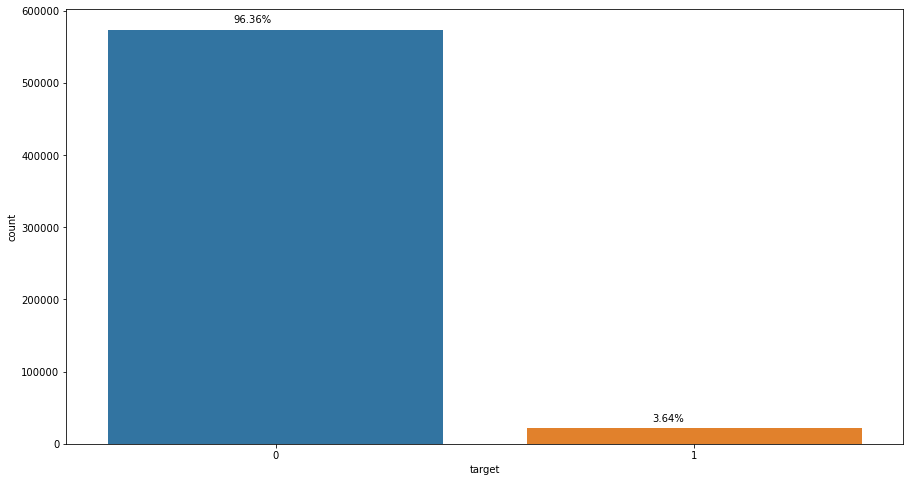

In [13]:
import seaborn as sns
plt.figure(figsize=(15,8))
ax = sns.countplot('target', data=data_nm)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(data_nm['target'])), 
                (p.get_x() + 0.3, p.get_height() + 10000))

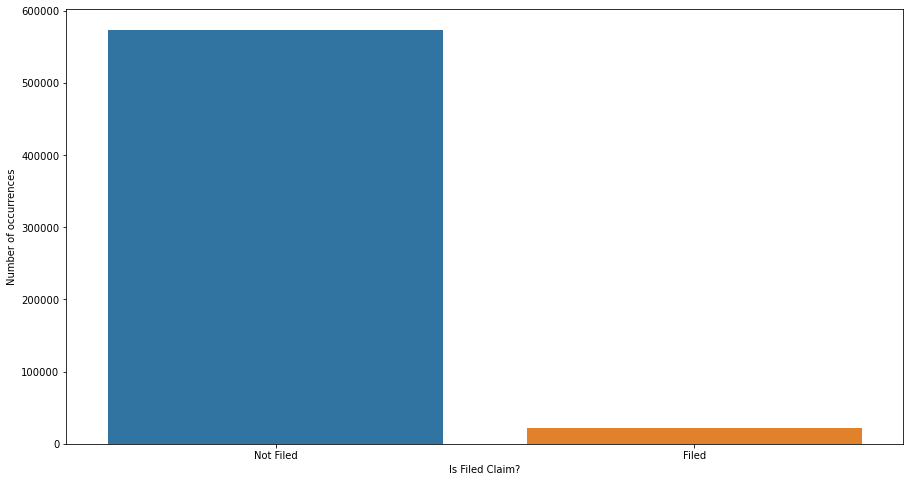

In [14]:
### Target variable exploration
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(data_nm.target_name);
plt.xlabel('Is Filed Claim?');
plt.ylabel('Number of occurrences');
plt.show()

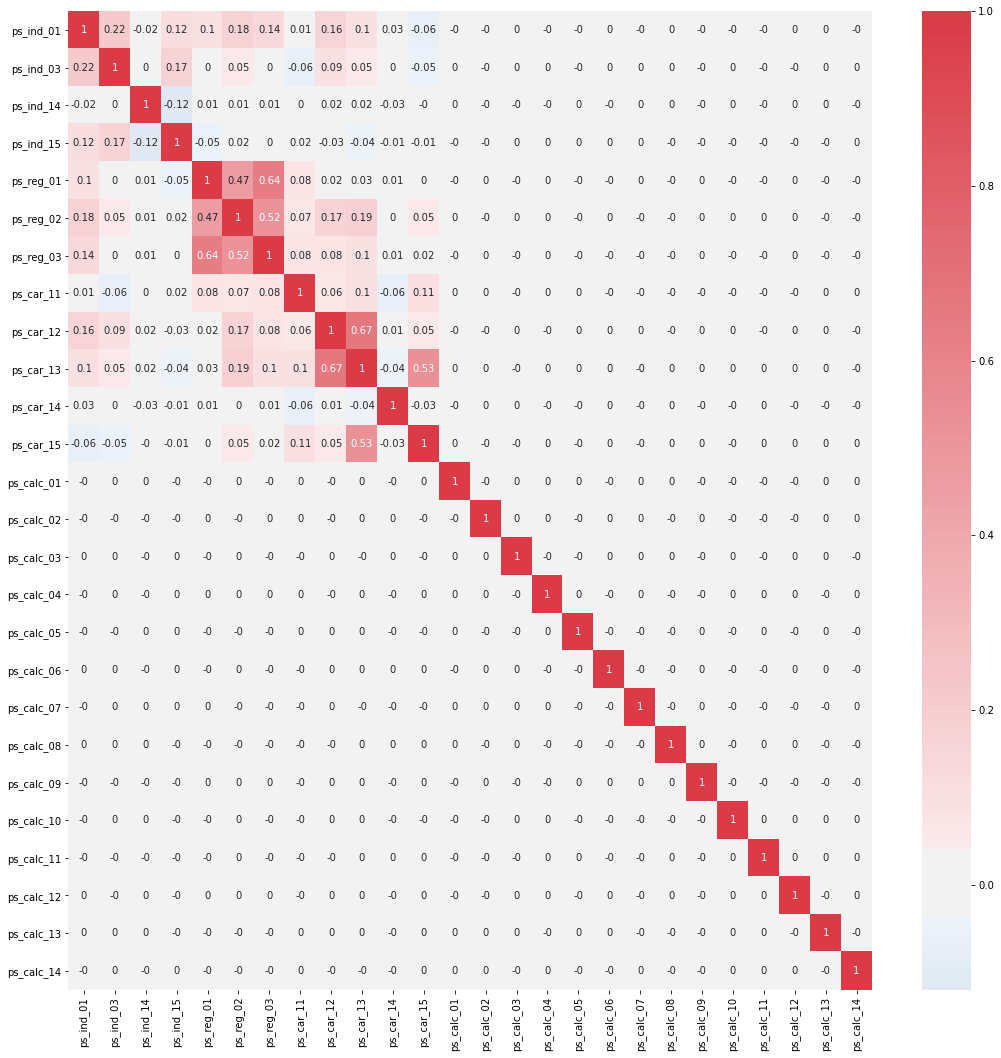

In [15]:
### Co-relation matrix heatmap
# Getting correlation matrix for numeric_fetaures
cor_matrix = data_nm[numeric_features].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

#Summary :
#Majority of the features do not show any significant correlation.
#There are a few features that show some negative correlation.
#Positive correlation is also very rare and weak.
#We can safely conclude that our features are independent.¶

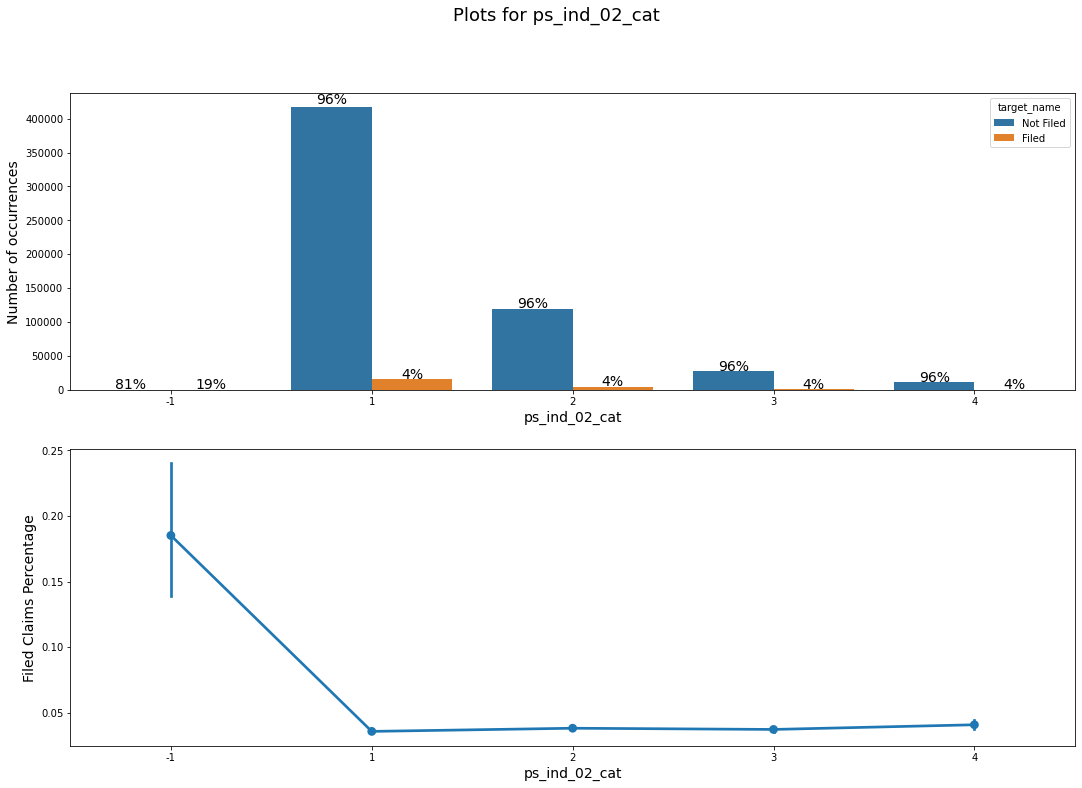

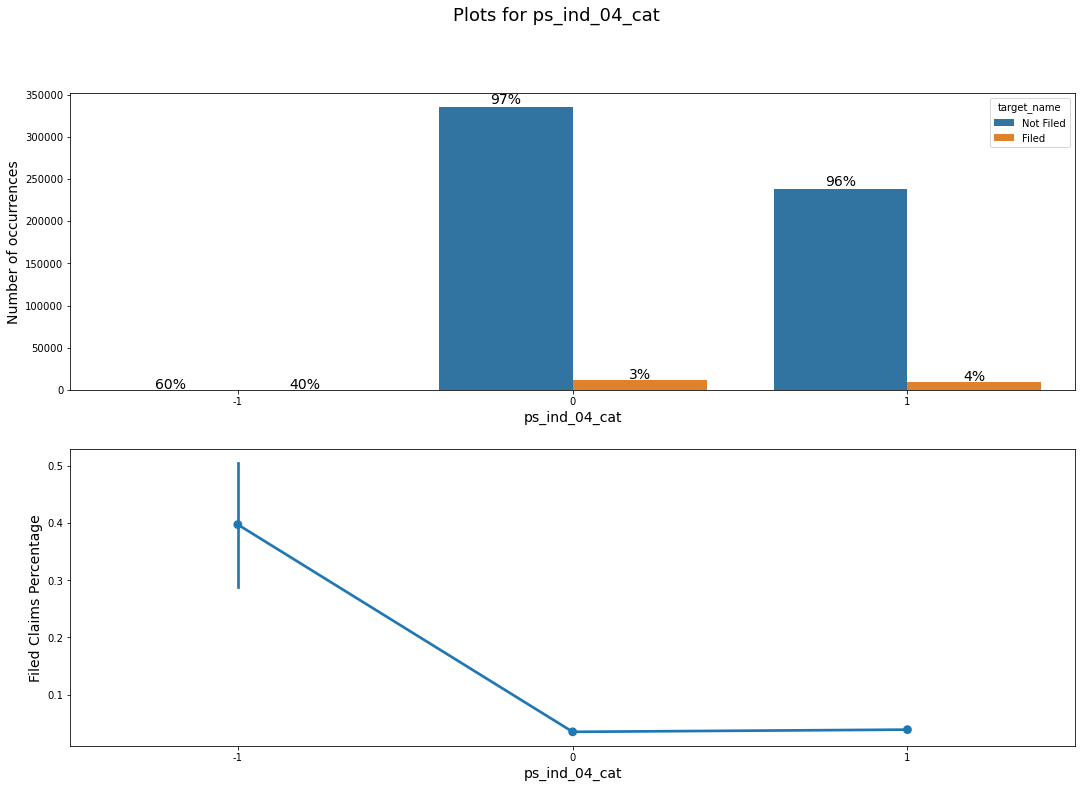

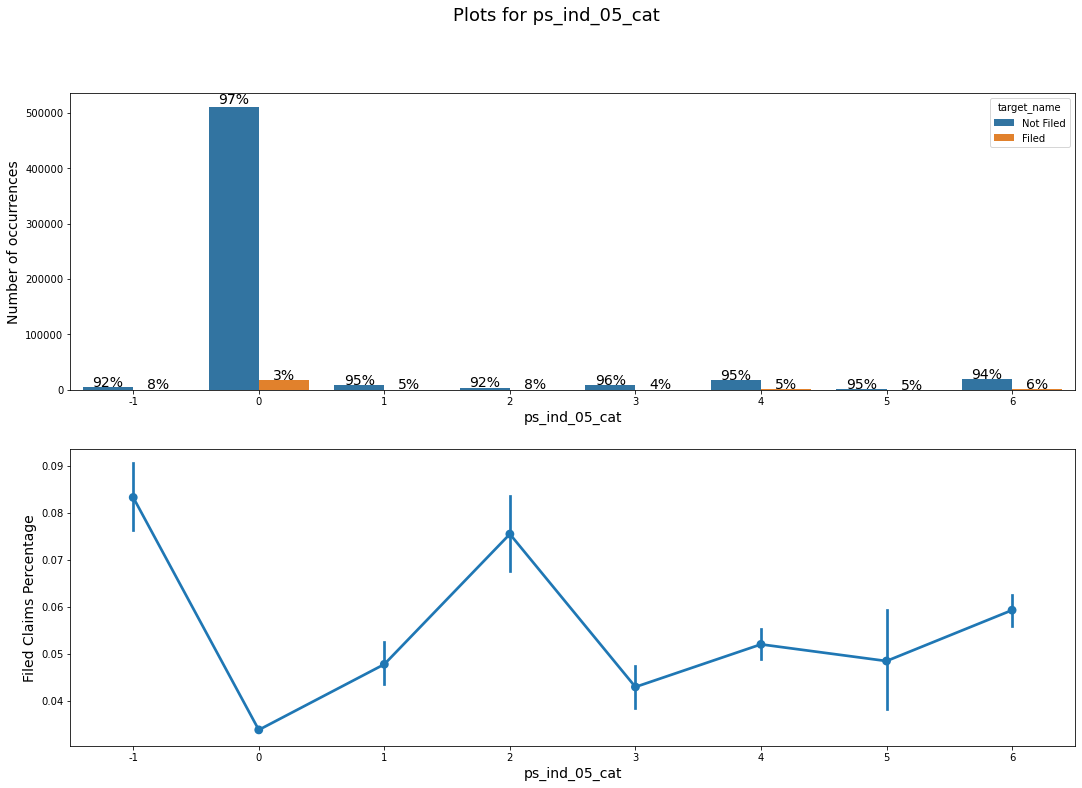

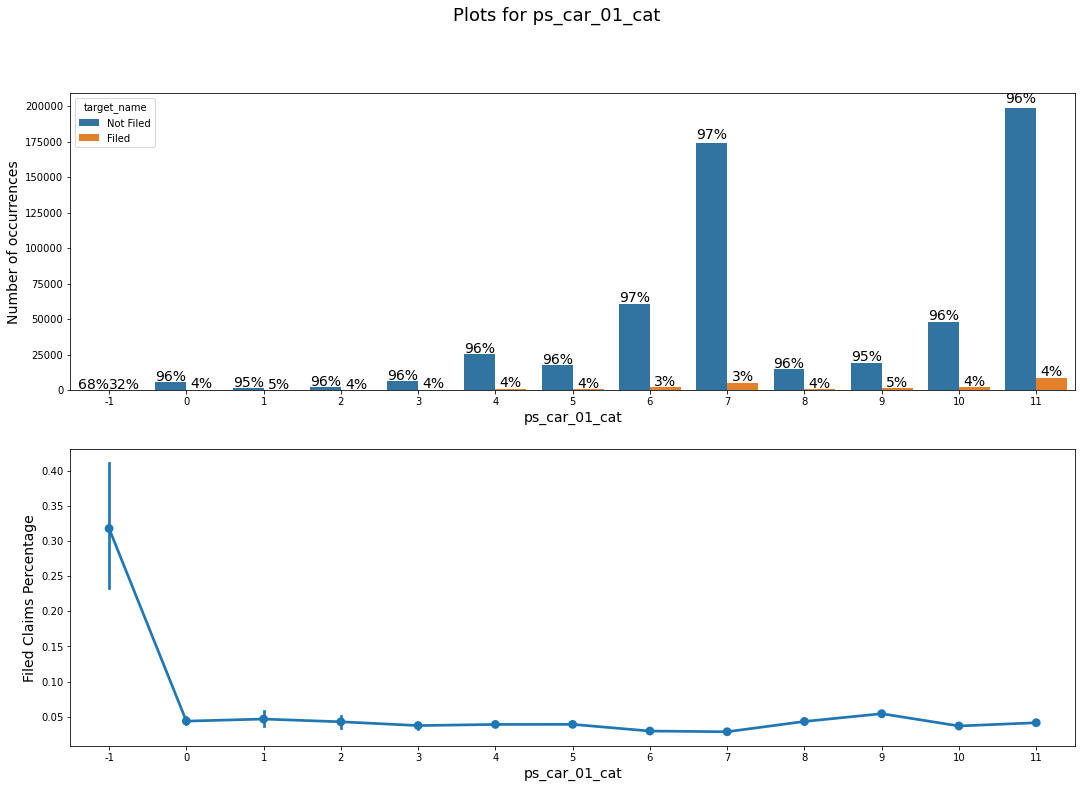

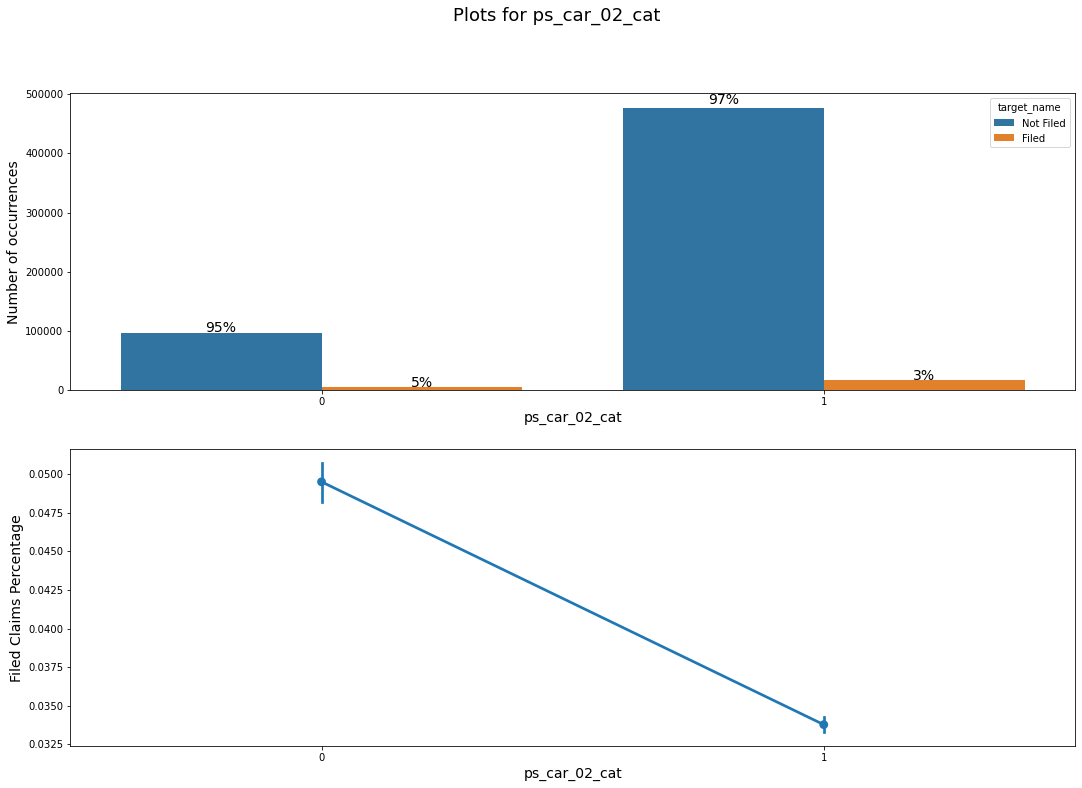

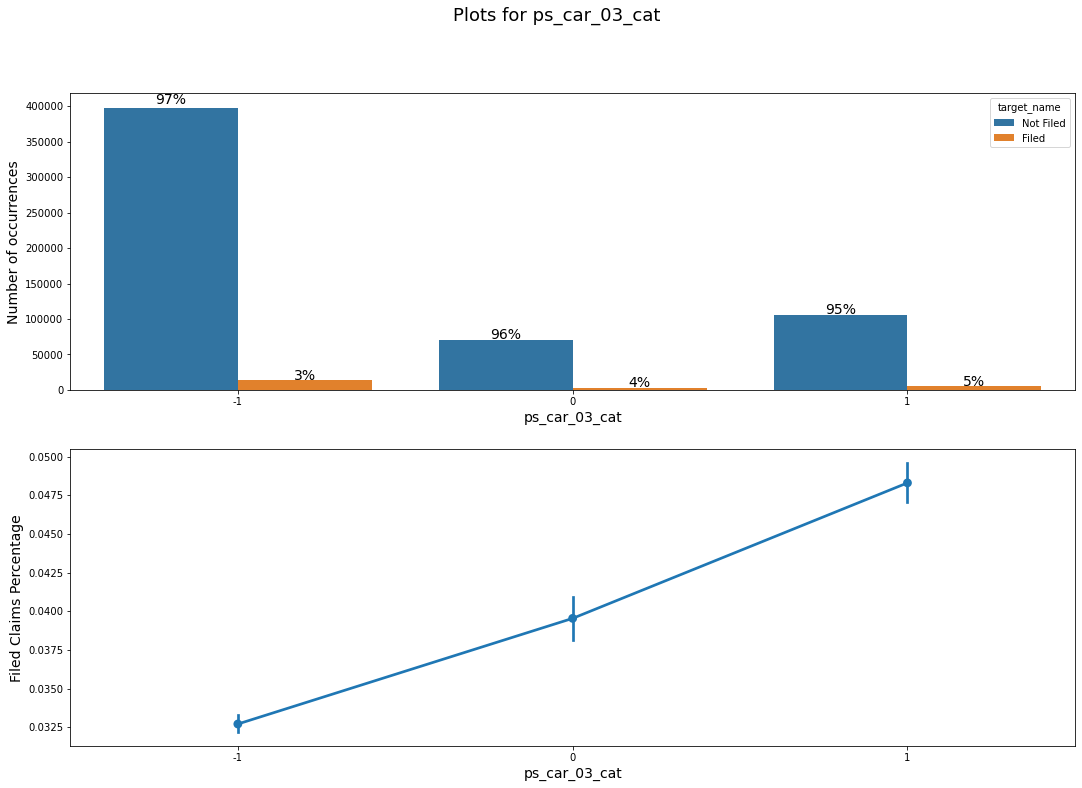

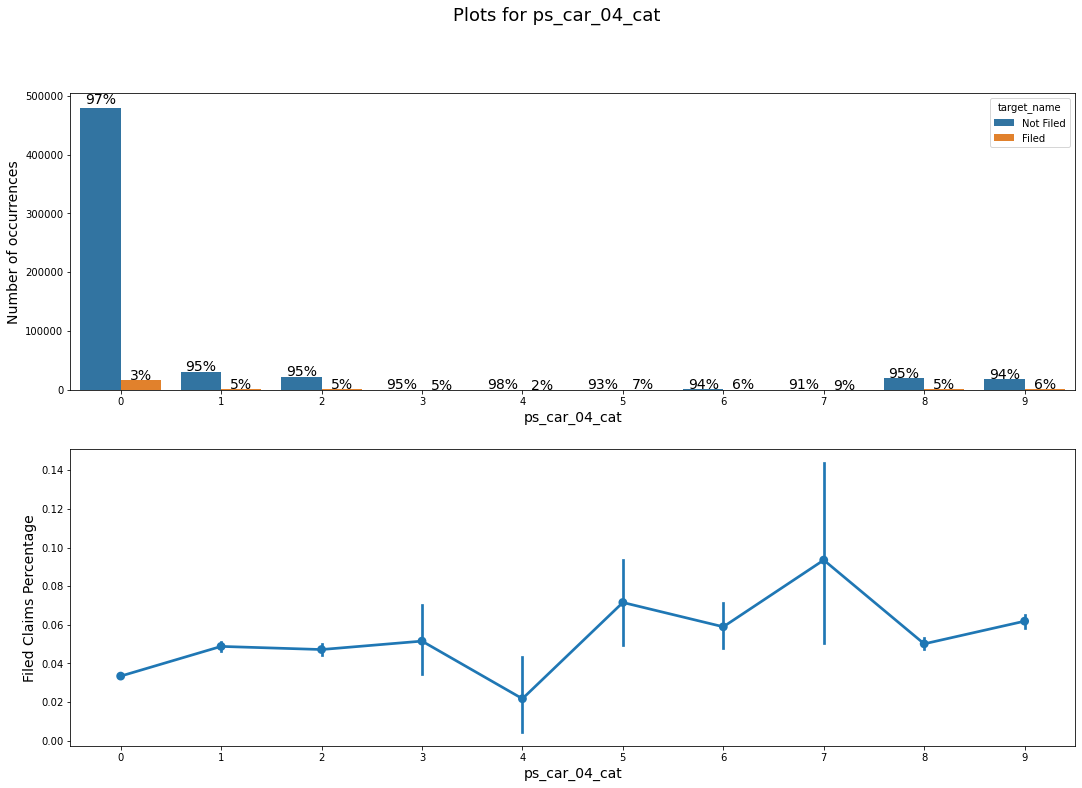

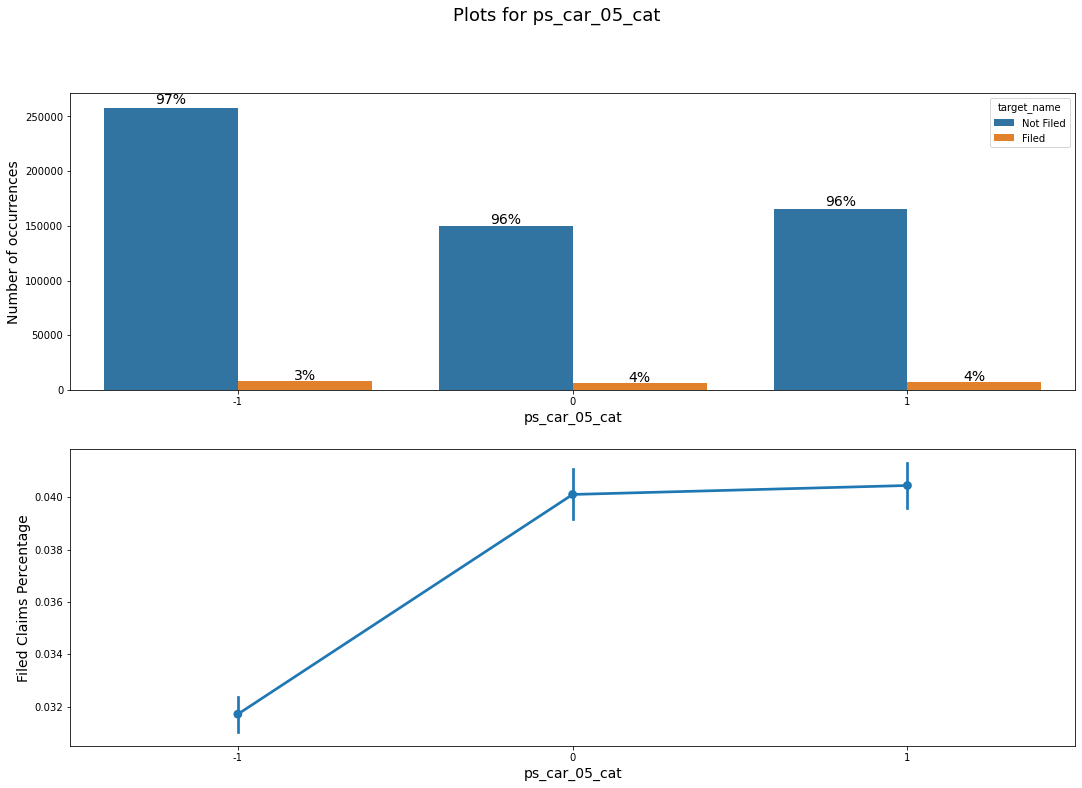

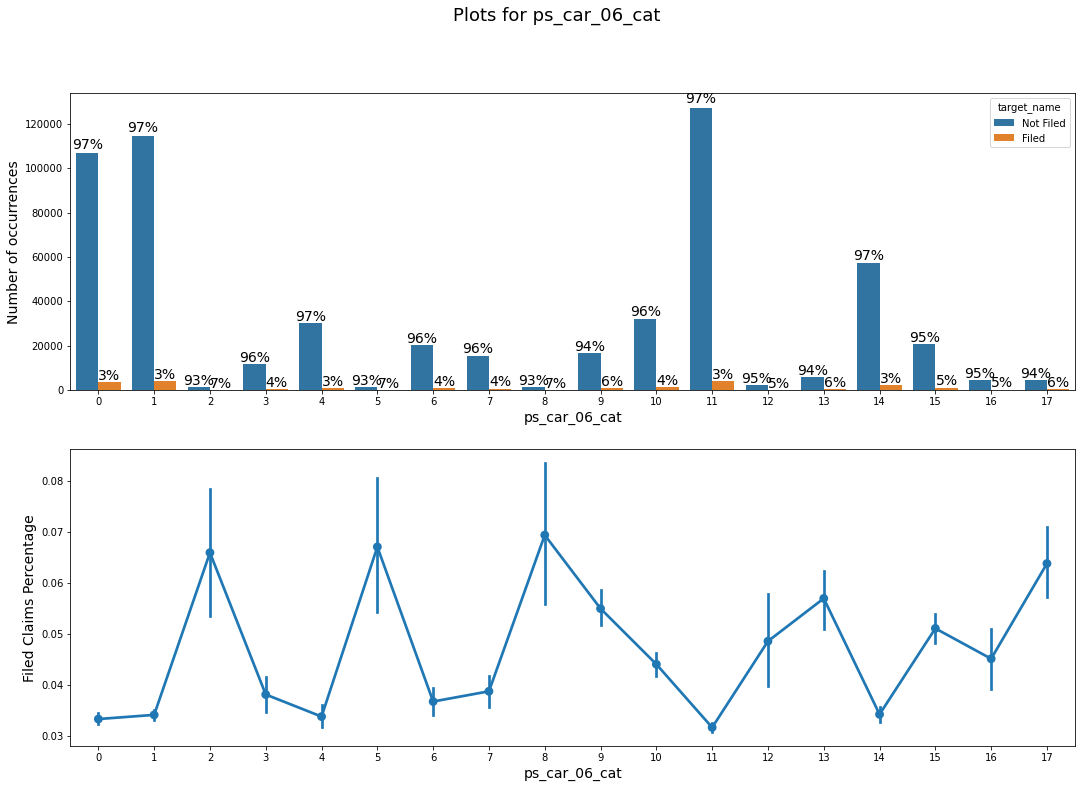

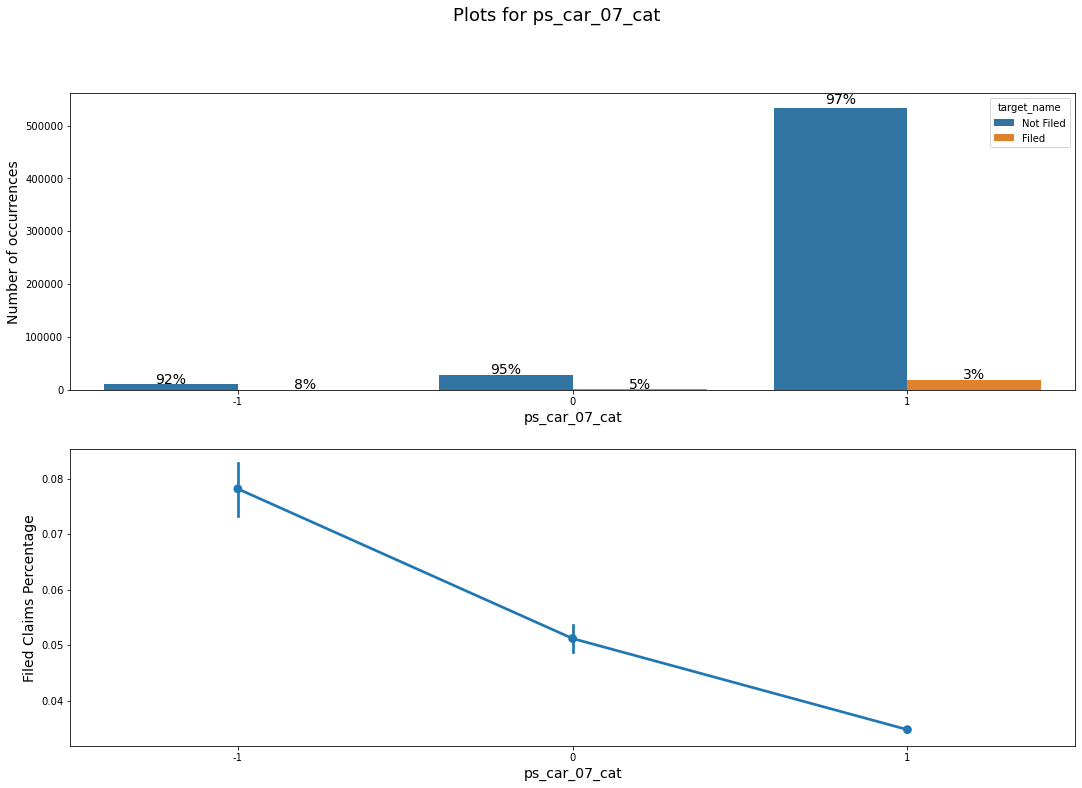

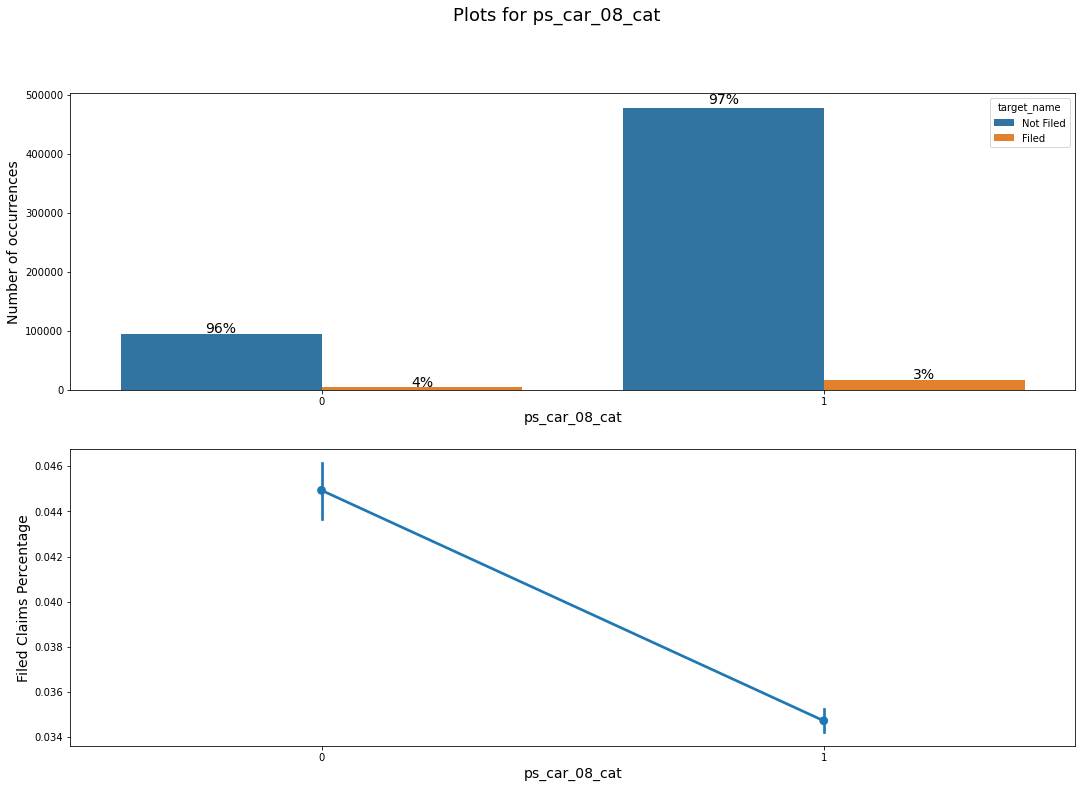

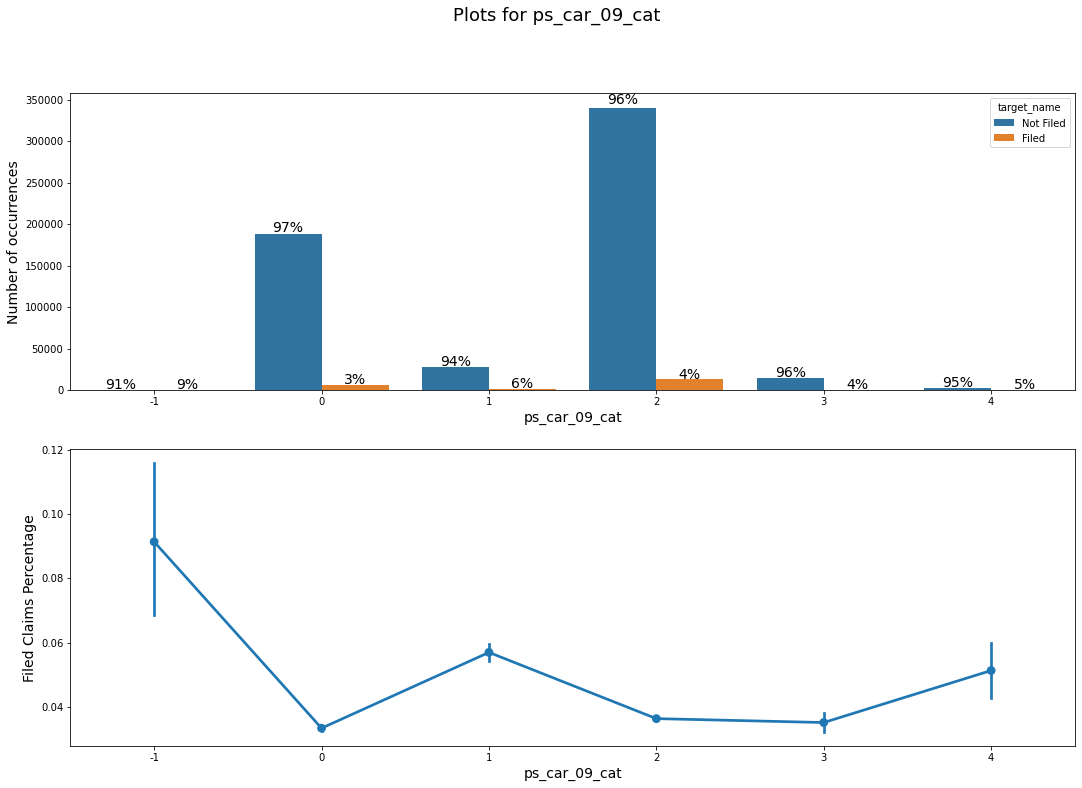

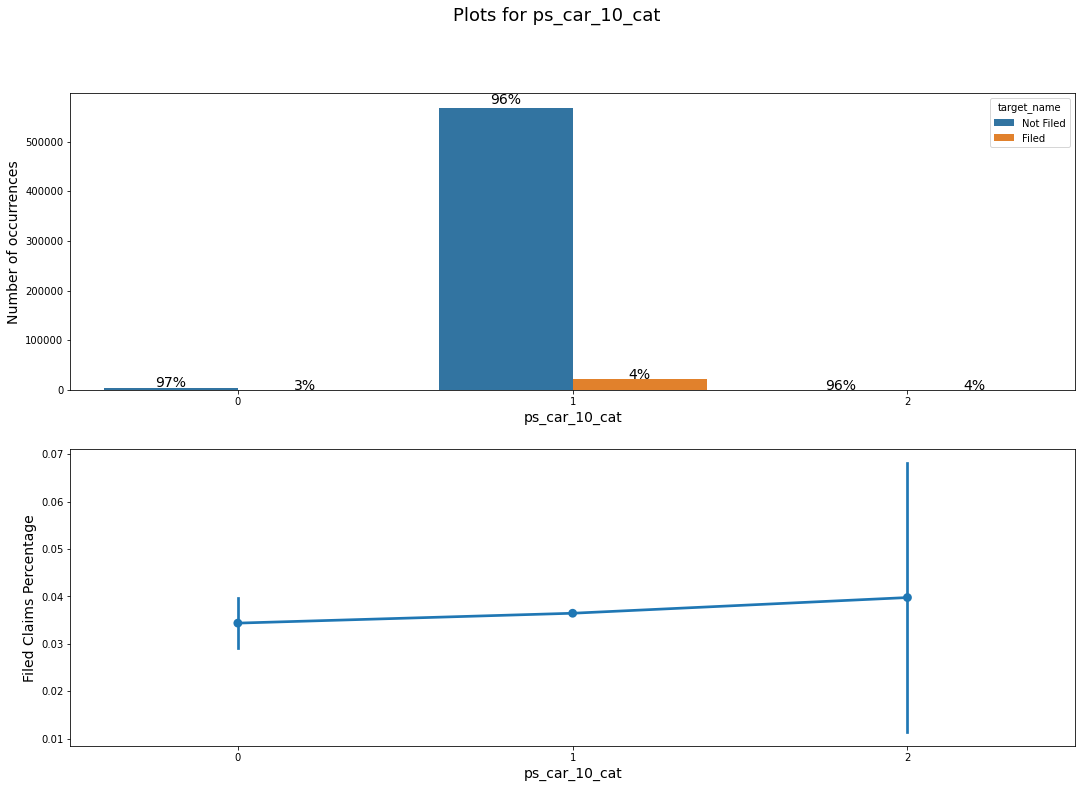

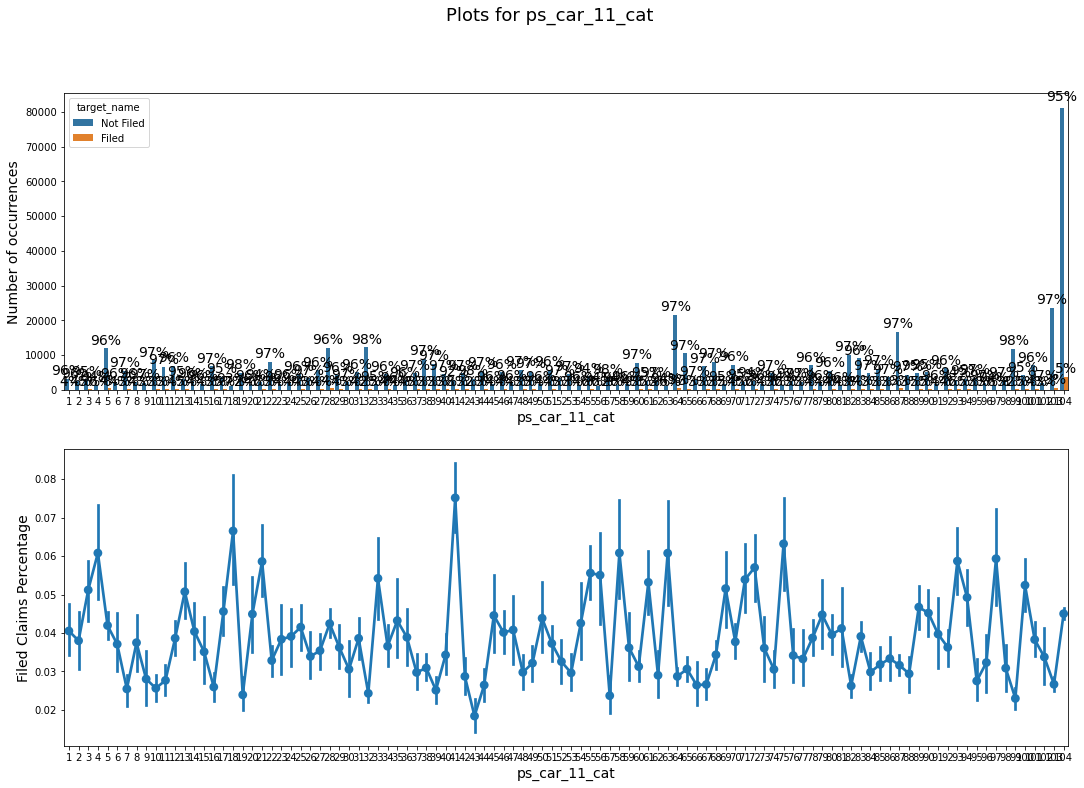

In [16]:
### Plotting Categorical Features
# Looping through and Plotting Categorical features
for column in categorical_features:
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Number of occurrences per categoty - target pair
    ax = sns.countplot(x=column, hue="target_name", data=data_nm, ax = plt.subplot(211));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14)
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 1000,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 

    
    ### Filed Claims percentage for every value of feature
    sns.pointplot(x=column, y='target', data=data_nm, ax = plt.subplot(212));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Filed Claims Percentage', fontsize=14);
    # Printing Chart
    plt.show()

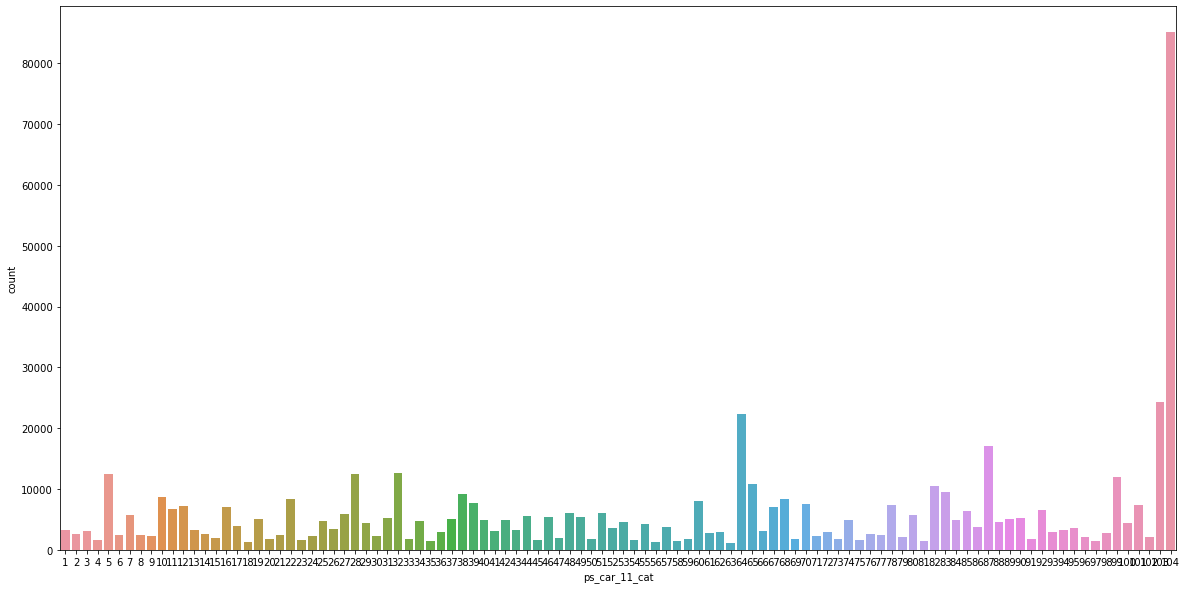

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(data_nm['ps_car_11_cat'])

In [18]:
print ("There are {} unique values for ps_car_11_cat" .format(data_nm['ps_car_11_cat'].nunique()))

There are 104 unique values for ps_car_11_cat


In [19]:
##Top 10 counted categories in ps_car_11_cat

data_nm['ps_car_11_cat'].value_counts().head(10)

104    85083
103    24262
64     22278
87     17106
32     12578
28     12538
5      12513
99     12042
65     10905
82     10470
Name: ps_car_11_cat, dtype: int64

In [20]:
# Study continously varying features
continuous_feat= [i for i in data_nm.columns if 
                    ((i not in binary_features) and (i not in categorical_features) and (i not in ["target", "id"]))]

In [21]:
data_nm[continuous_feat].head(5)

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,target_name
id,,,,,,,,,,,,,,,,,,,,,
7,2,5,0,11,0.7,0.2,0.718070,2,0.400000,0.883679,...,10,1,10,1,5,9,1,5,8,Not Filed
9,1,7,0,3,0.8,0.4,0.766078,3,0.316228,0.618817,...,9,5,8,1,7,3,1,1,9,Not Filed
13,5,9,0,12,0.0,0.0,-1.000000,1,0.316228,0.641586,...,9,1,8,2,7,4,2,7,7,Not Filed
16,0,2,0,8,0.9,0.2,0.580948,1,0.374166,0.542949,...,7,1,8,4,2,2,2,4,9,Not Filed
17,0,0,0,9,0.7,0.6,0.840759,3,0.316070,0.565832,...,6,3,10,2,12,3,1,1,3,Not Filed


In [22]:
ind_feat = [c for c in continuous_feat if c.startswith("ps_ind")]
reg_feat = [c for c in continuous_feat if c.startswith("ps_reg")]
car_feat = [c for c in continuous_feat if c.startswith("ps_car")]
calc_feat = [c for c in continuous_feat if c.startswith("ps_calc")]
target = ['target']

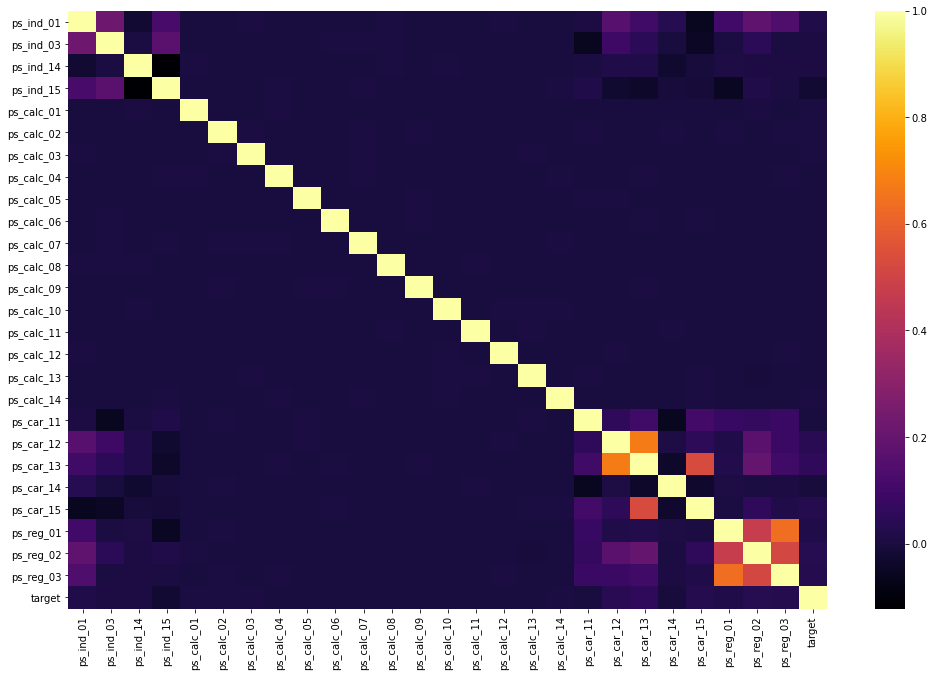

In [23]:
plt.figure(figsize=(17,11))
sns.heatmap(data_nm[ind_feat+ calc_feat + car_feat + reg_feat + target].corr(), cmap= plt.cm.inferno)

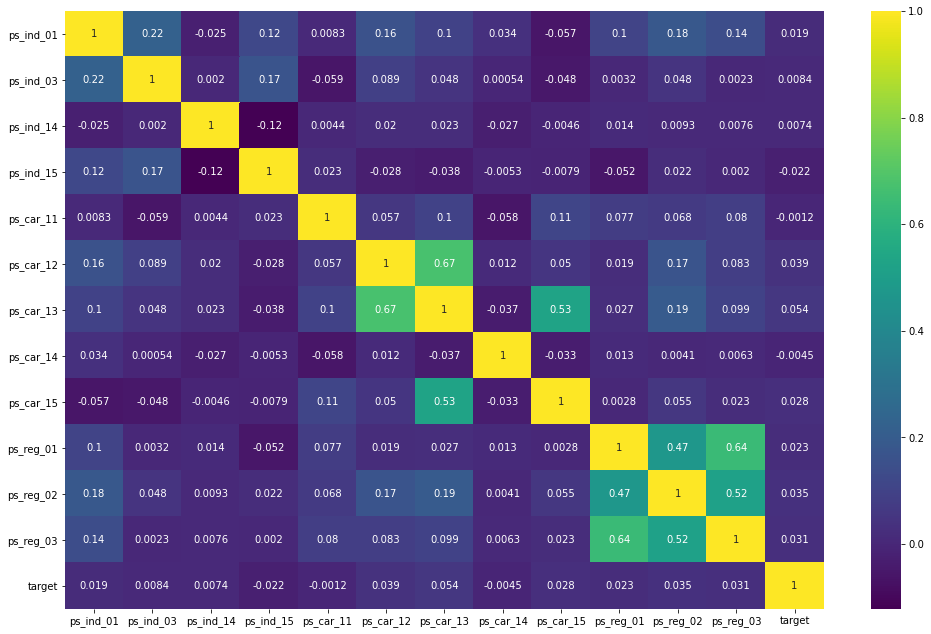

In [24]:
##As Something clicked at top left and bottom right portion. Let's remove calc_feat and observe the heatmap

plt.figure(figsize=(17,11))
sns.heatmap(data_nm[ind_feat+ car_feat + reg_feat + target].corr(), cmap= 'viridis', annot=True)

#A high positive value indicates a strong positive correlation and a low negative value indicates a strong negative correlation.

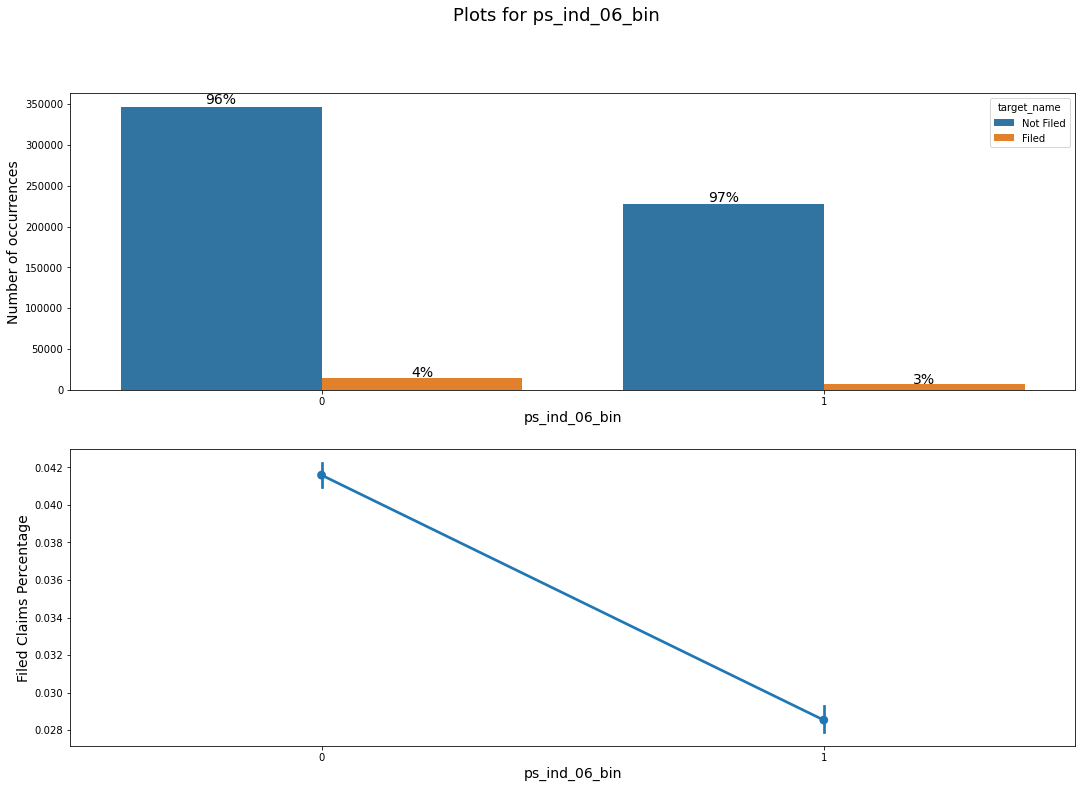

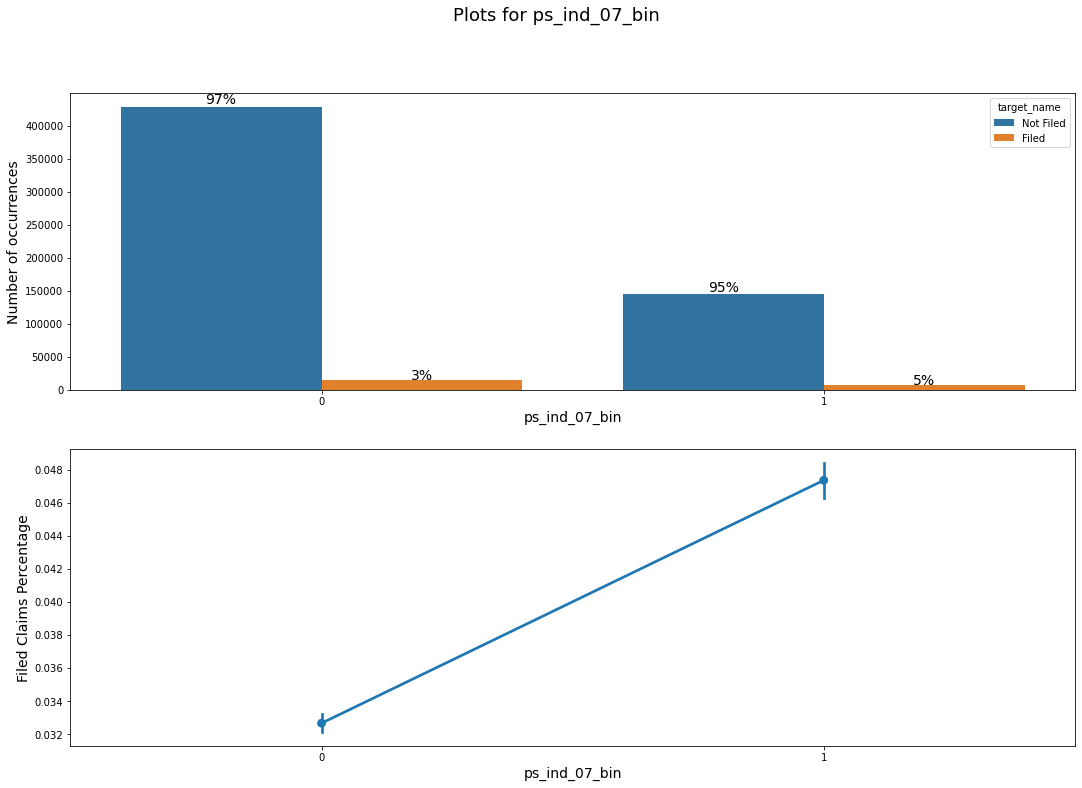

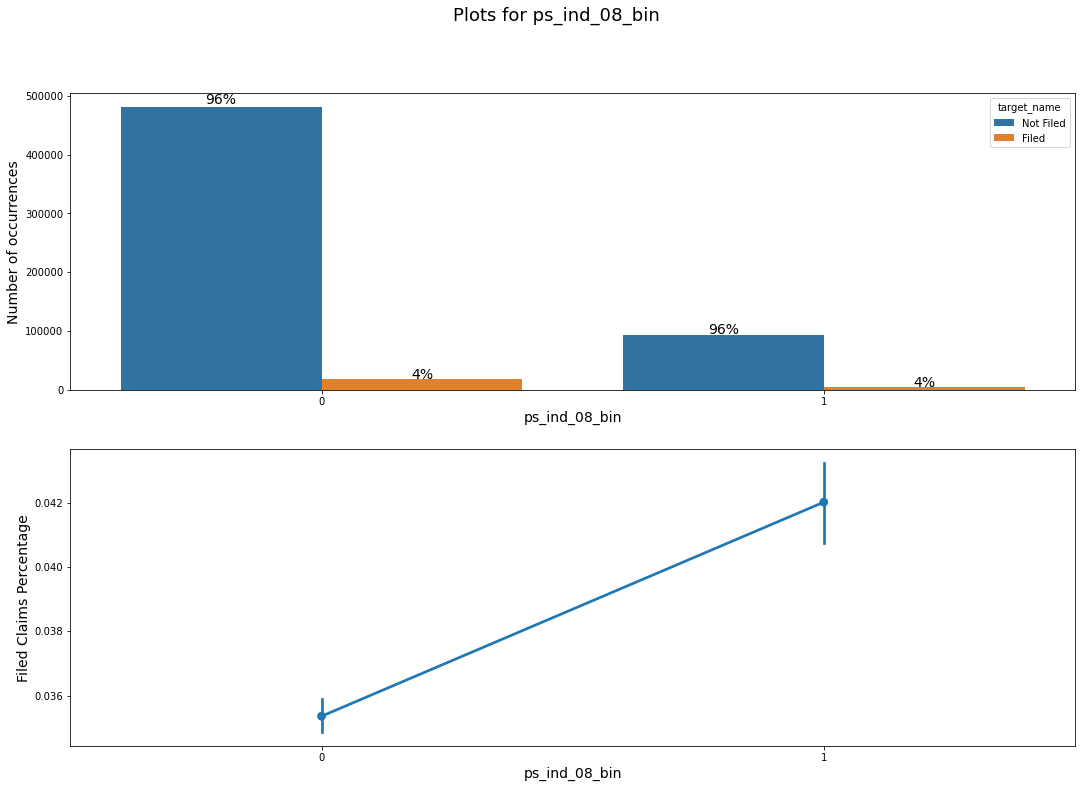

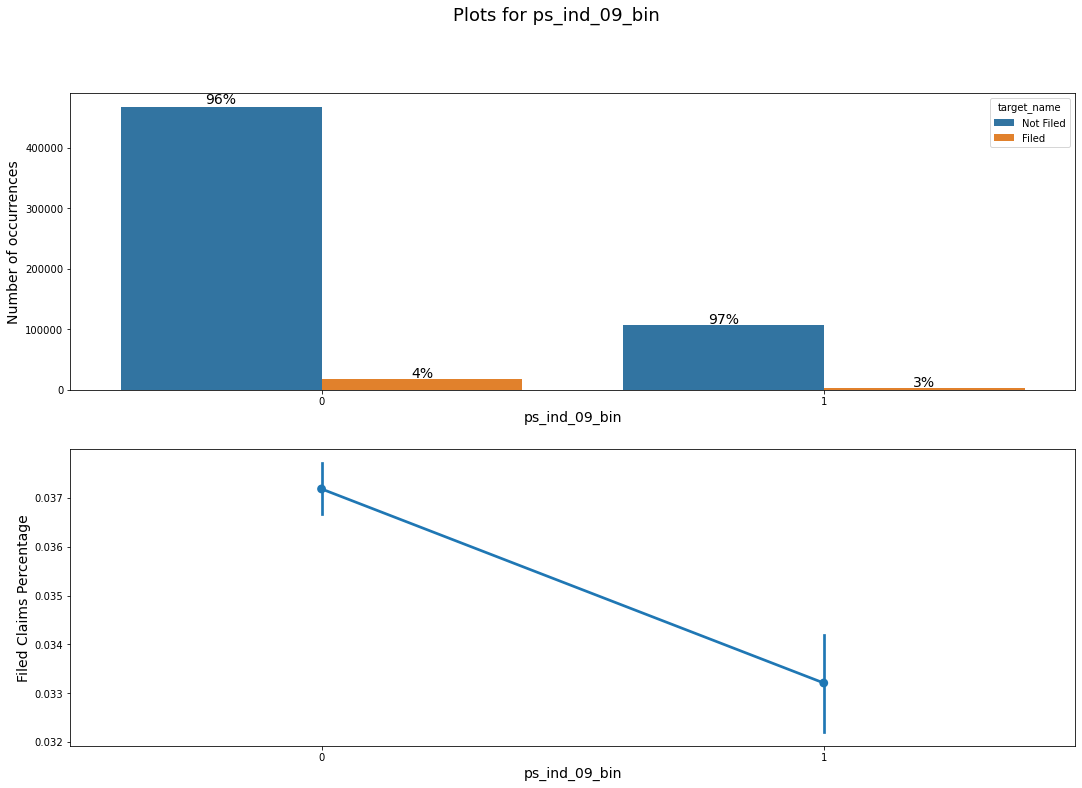

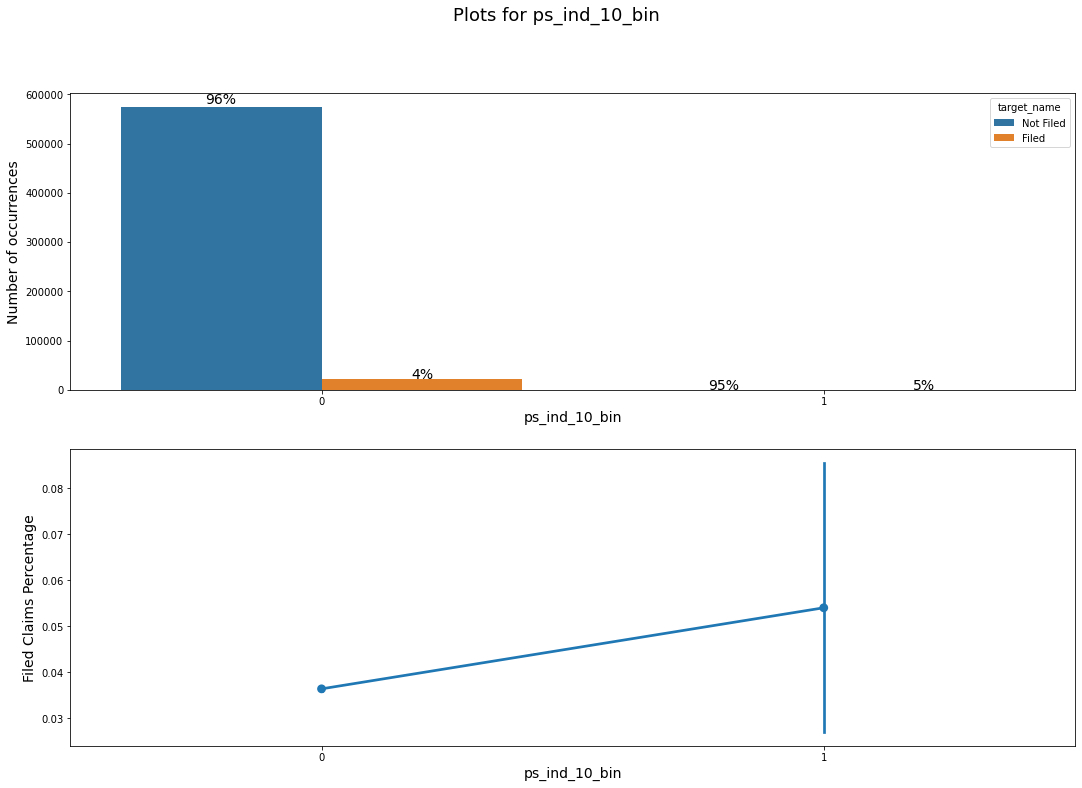

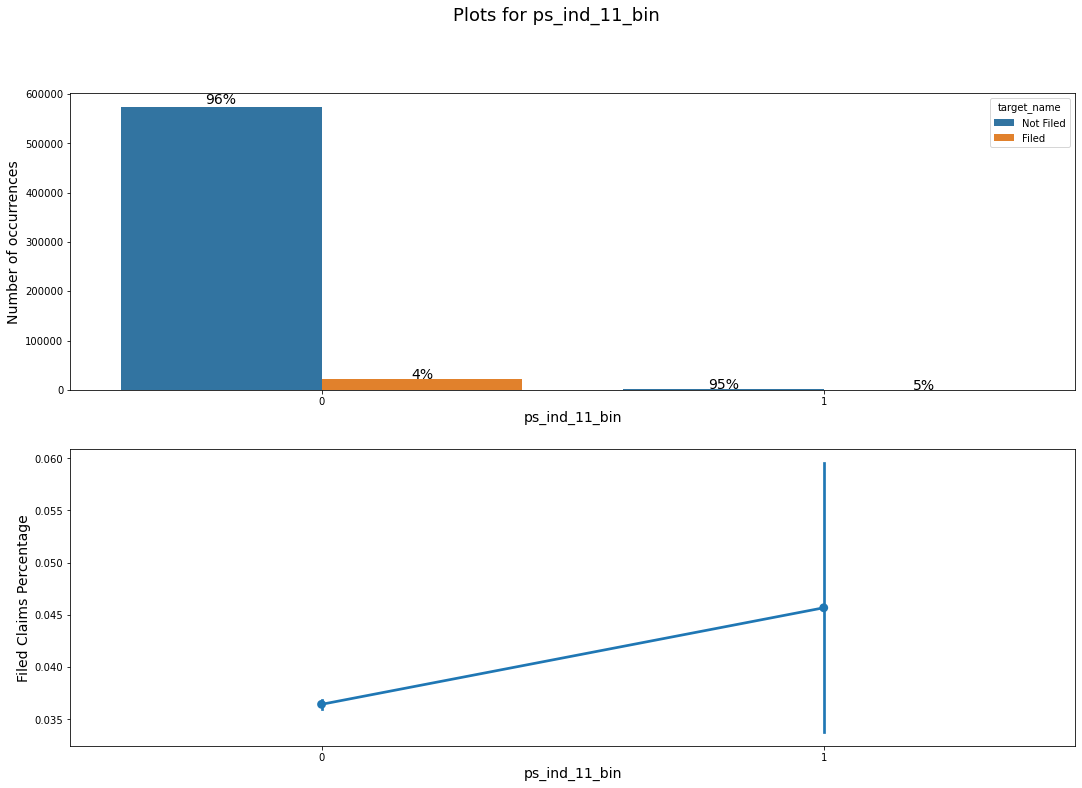

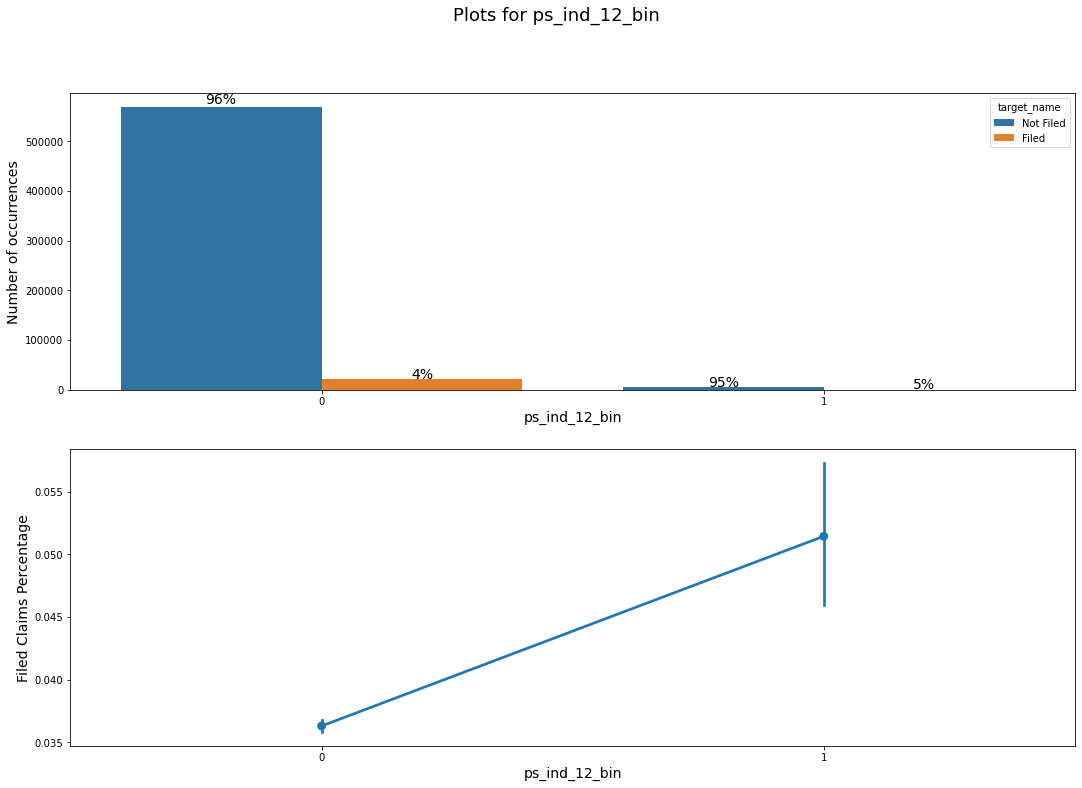

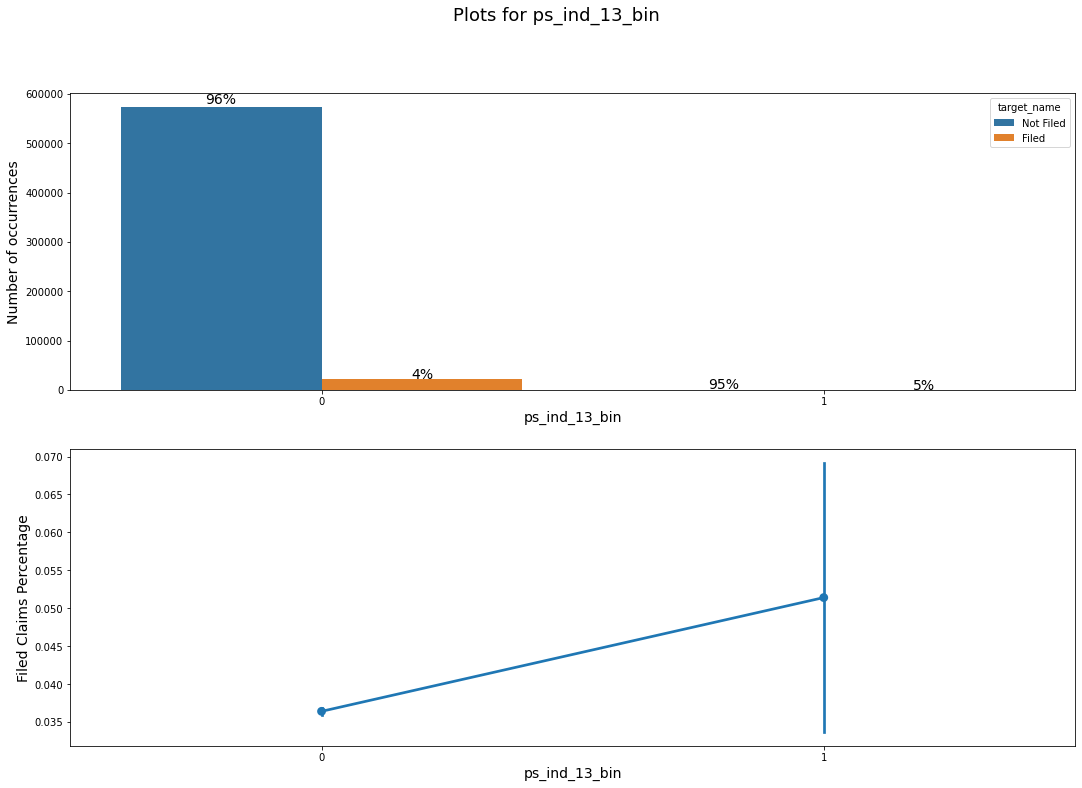

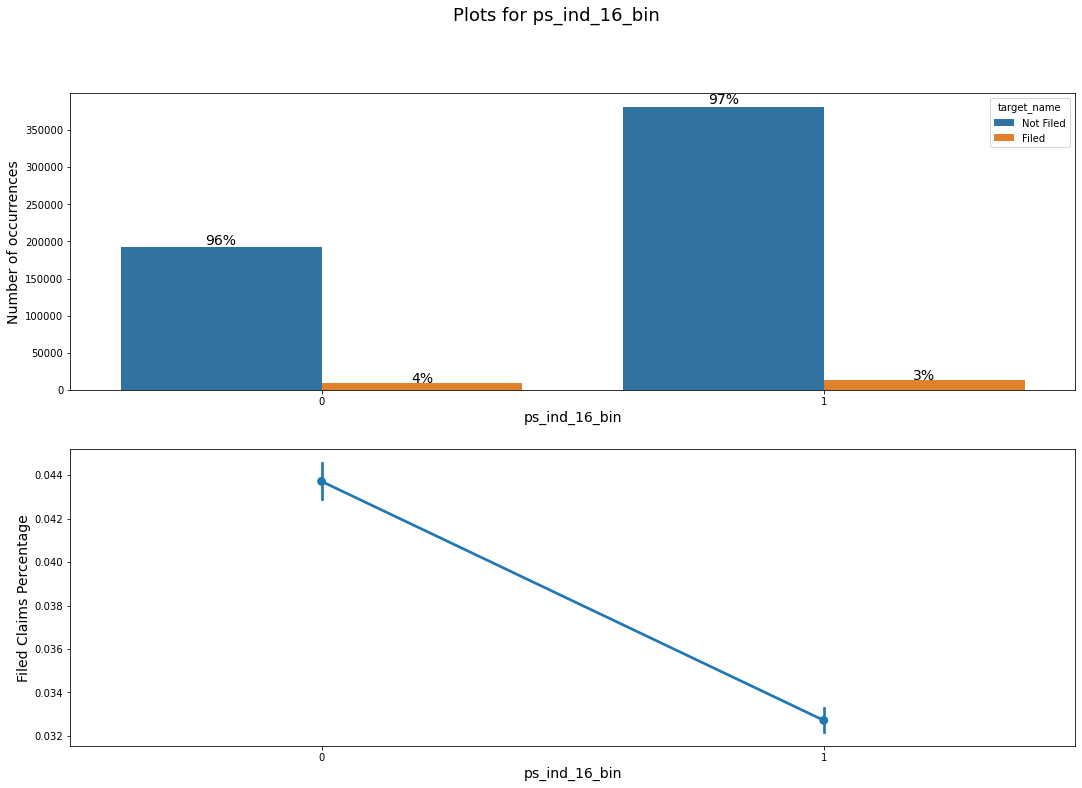

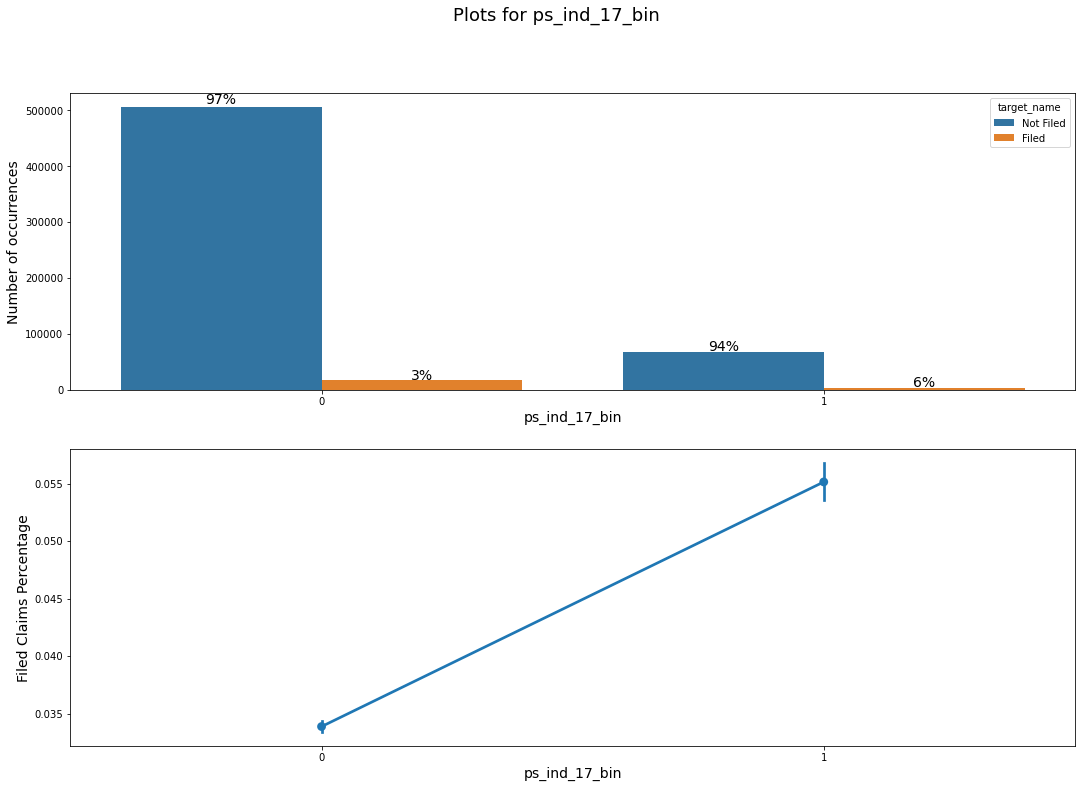

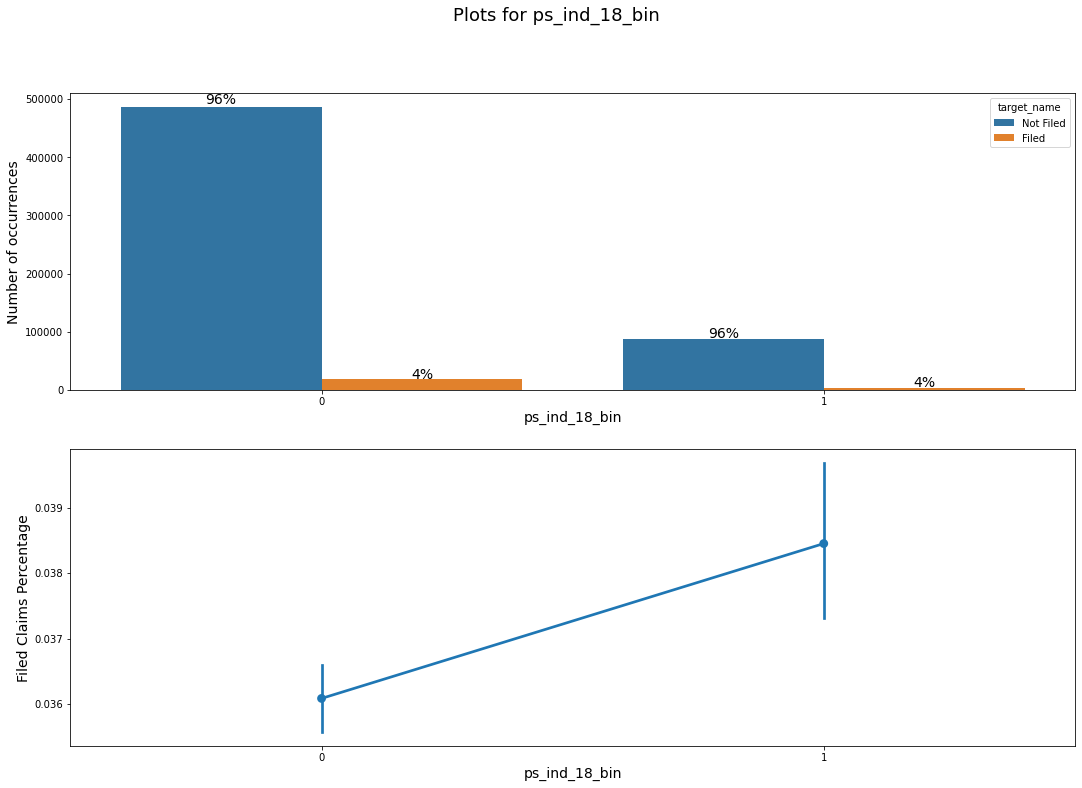

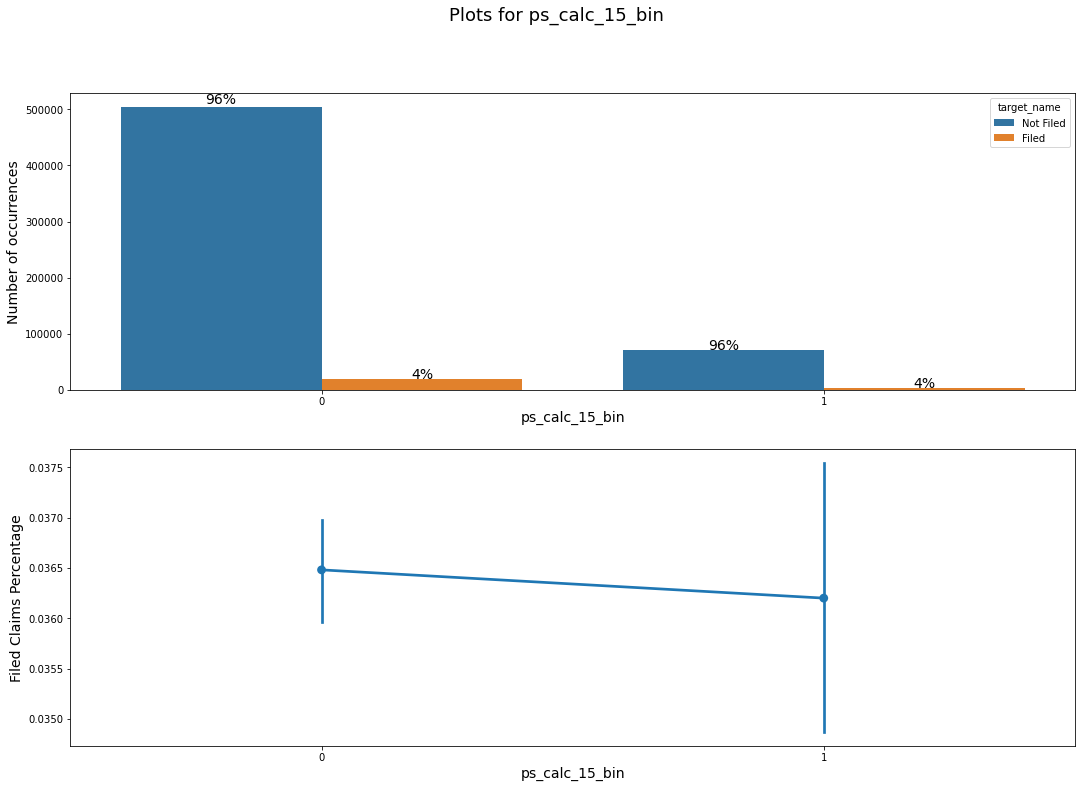

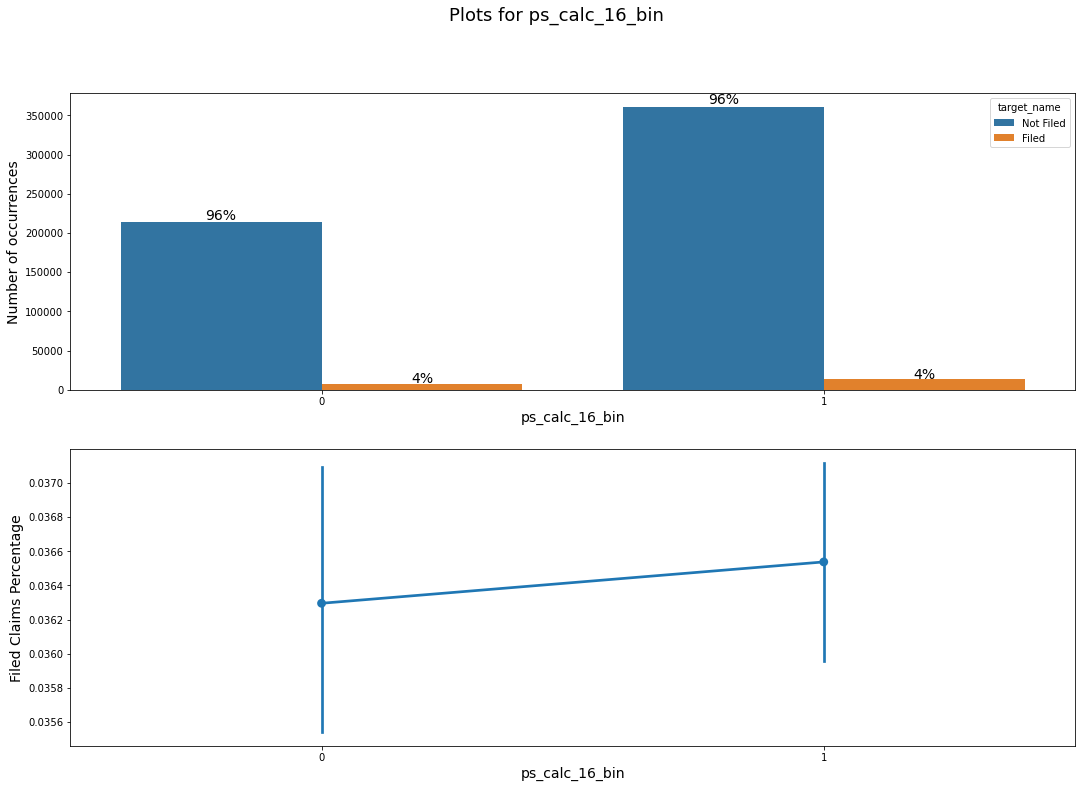

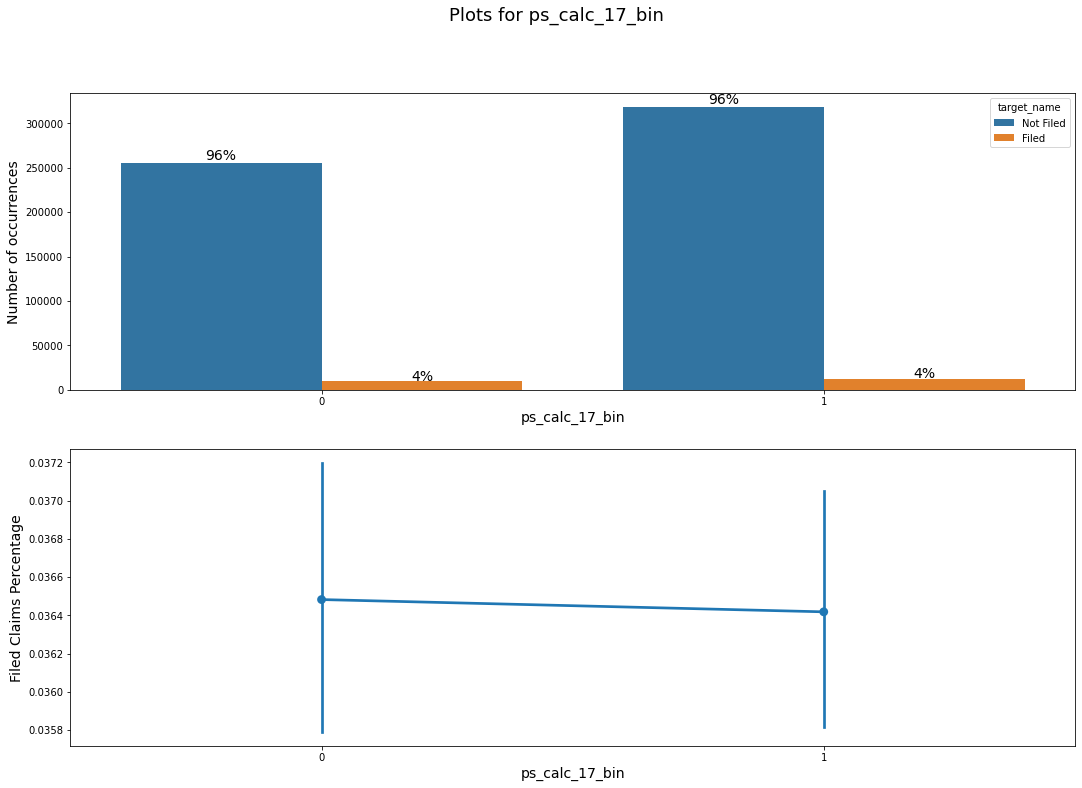

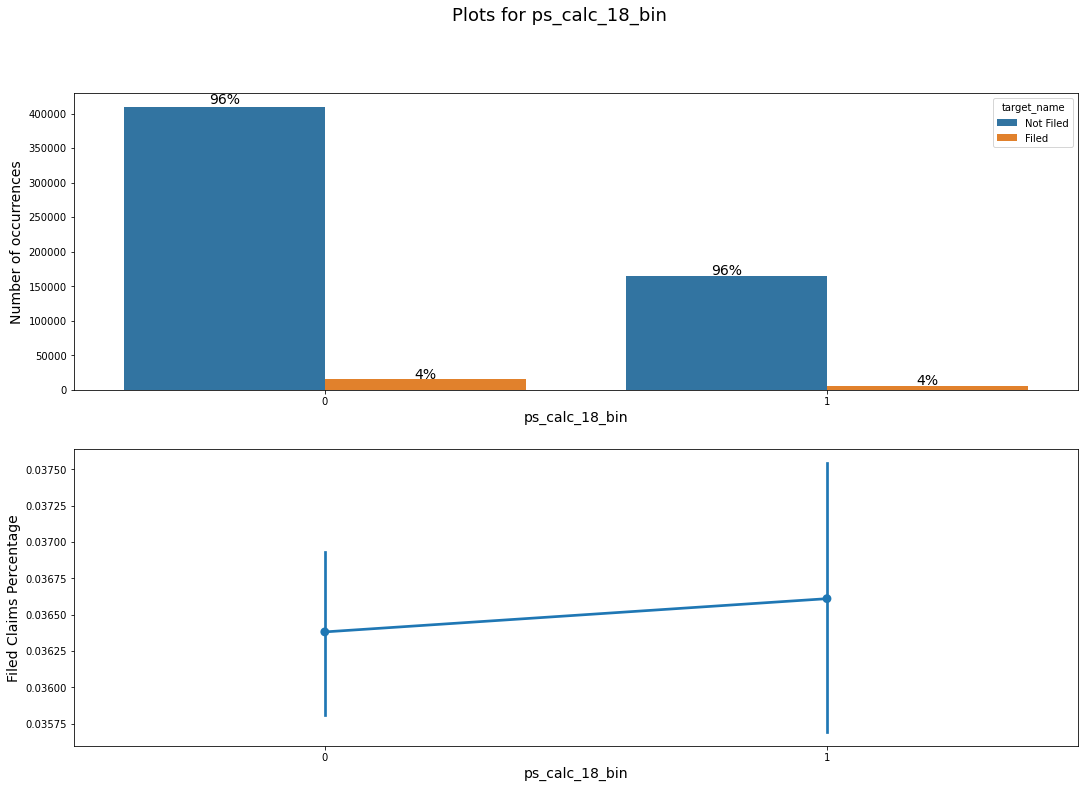

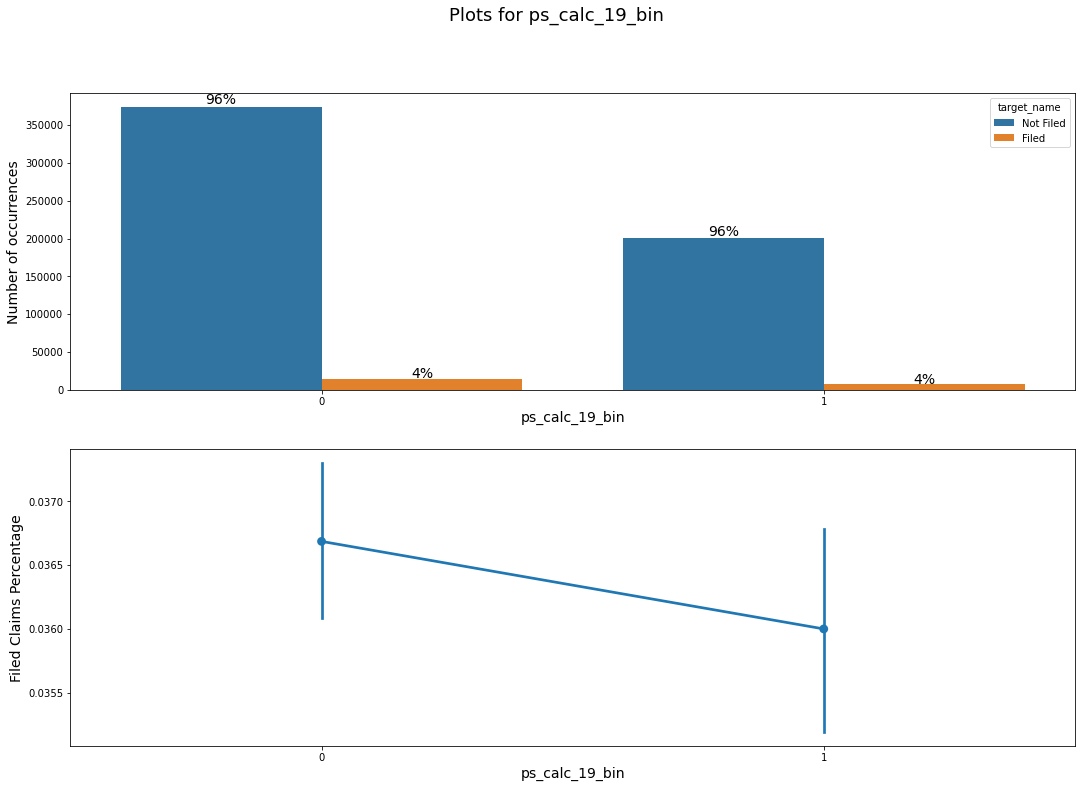

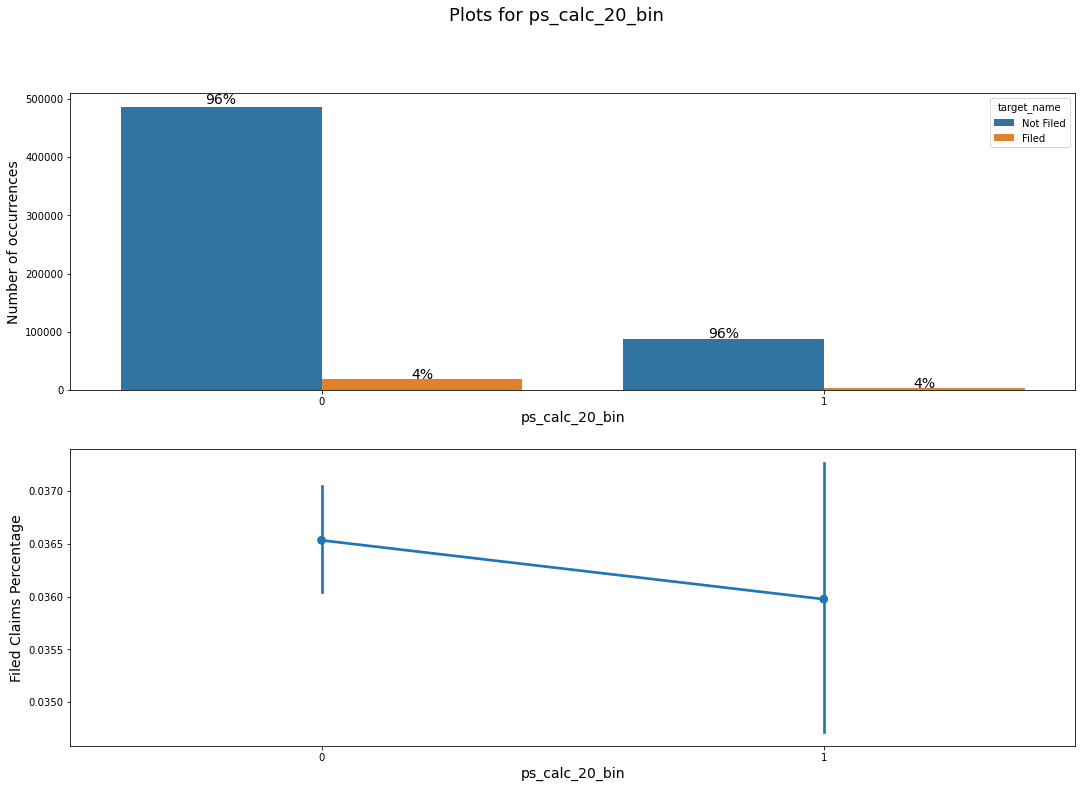

In [25]:
### Plotting Binary Features
# Looping through and Plotting Binary features
for column in binary_features:
    ### Figure initiation 
    fig = plt.figure(figsize=(18,12))
    
    ### Number of occurrences per binary value - target pair
    ax = sns.countplot(x=column, hue="target_name", data=data_nm, ax = plt.subplot(211));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14)
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 1000,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 
        

    ### Filed Claims percentage for every value of feature
    sns.pointplot(x=column, y='target', data=data_nm, ax = plt.subplot(212));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Filed Claims Percentage', fontsize=14);
    # Printing Chart
    plt.show()
    
#Summary :
#1. Features in the [ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin] has very high imbalance and 
#contains same value for almost all the data points. Such features are of little use.
#2. Features in the [ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin]row have more balance than the 
#above features hence, they are more useful
#3.ps_ind_16_bin shows more balance than the above two.

In [26]:
print(categorical_features)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


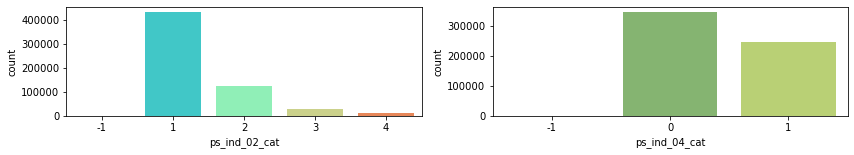

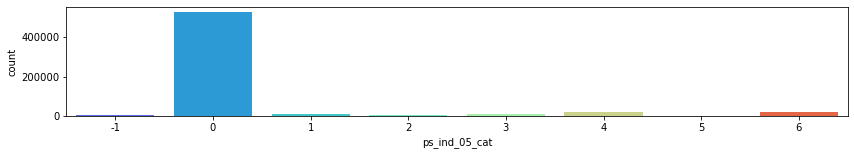

In [27]:
## Let have a look at Univariate analysis on Categorical Features which helps us in  
#summarizing the data and finds patterns in the data

fig ,ax = plt.subplots(1,2,figsize=(14,2))
ax1,ax2, = ax.flatten()
sns.countplot(data_nm['ps_ind_02_cat'],palette='rainbow',ax=ax1)
sns.countplot(data_nm['ps_ind_04_cat'],palette='summer',ax=ax2)
fig,ax = plt.subplots(figsize=(14,2))
sns.countplot(data_nm['ps_ind_05_cat'],palette='rainbow',ax=ax)

#Summary 
#1. The number of levels in the individual categorical features are very low.
#2. In the 1st two of them, a couple of features are dominating while in the 3rd one, only a single feature is very dominating.
#This makes it of little use.

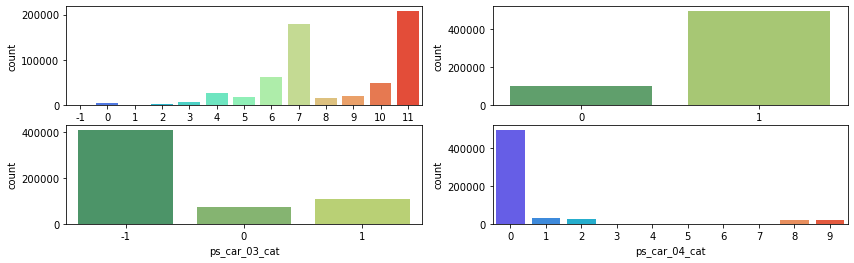

In [28]:
fig,ax = plt.subplots(2,2,figsize=(14,4))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data_nm['ps_car_01_cat'],palette='rainbow',ax=ax1)
sns.countplot(data_nm['ps_car_02_cat'],palette='summer',ax=ax2)
sns.countplot(data_nm['ps_car_03_cat'],palette='summer',ax=ax3)
sns.countplot(data_nm['ps_car_04_cat'],palette='rainbow',ax=ax4)

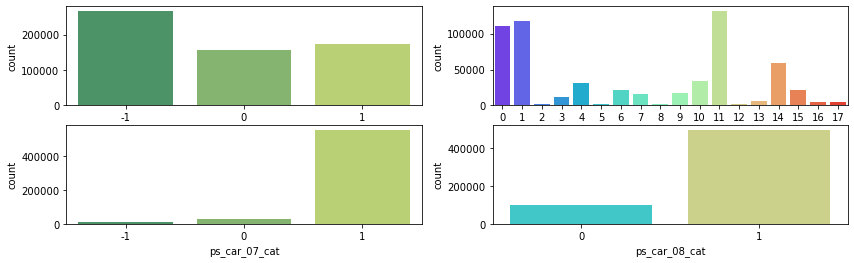

In [29]:
fig,ax = plt.subplots(2,2,figsize = (14,4))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data_nm['ps_car_05_cat'],palette='summer',ax=ax1)
sns.countplot(data_nm['ps_car_06_cat'],palette='rainbow',ax=ax2)
sns.countplot(data_nm['ps_car_07_cat'],palette='summer',ax=ax3)
sns.countplot(data_nm['ps_car_08_cat'],palette='rainbow',ax=ax4)

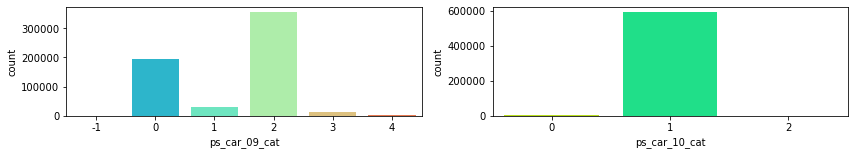

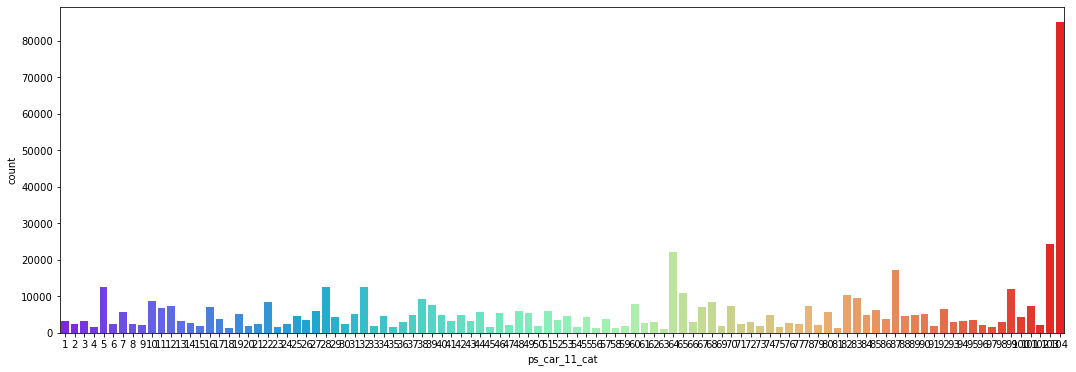

In [30]:
fig, ax = plt.subplots(1,2,figsize=(14,2))
ax1,ax2 = ax.flatten()
sns.countplot(data_nm['ps_car_09_cat'],palette='rainbow',ax=ax1)
sns.countplot(data_nm['ps_car_10_cat'],palette='gist_rainbow',ax=ax2)
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(data_nm['ps_car_11_cat'],palette='rainbow',ax=ax)

In [31]:
# Lets Work on Binary Features Univariate analysis
print(binary_features)

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


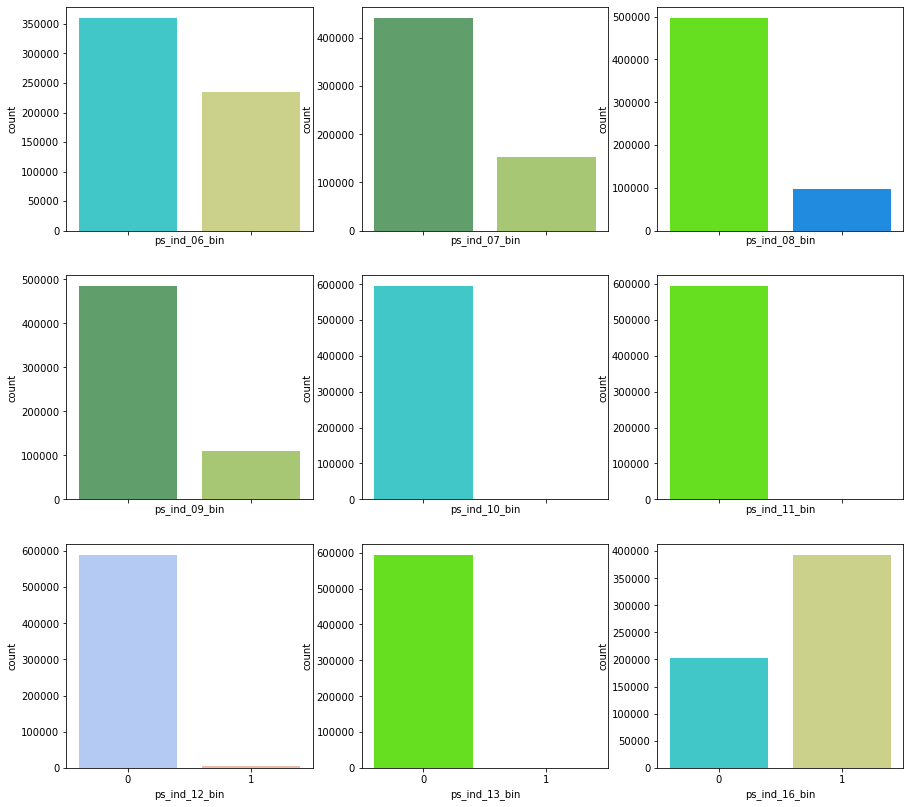

In [32]:
fig,ax = plt.subplots(3,3,figsize=(15,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9 = ax.flatten()
sns.countplot(data_nm['ps_ind_06_bin'],palette='rainbow',ax=ax1)
sns.countplot(data_nm['ps_ind_07_bin'],palette='summer',ax=ax2)
sns.countplot(data_nm['ps_ind_08_bin'],palette='gist_rainbow',ax=ax3)
sns.countplot(data_nm['ps_ind_09_bin'],palette='summer',ax=ax4)
sns.countplot(data_nm['ps_ind_10_bin'],palette='rainbow',ax=ax5)
sns.countplot(data_nm['ps_ind_11_bin'],palette='gist_rainbow',ax=ax6)
sns.countplot(data_nm['ps_ind_12_bin'],palette='coolwarm',ax=ax7)
sns.countplot(data_nm['ps_ind_13_bin'],palette='gist_rainbow',ax=ax8)
sns.countplot(data_nm['ps_ind_16_bin'],palette='rainbow',ax=ax9)

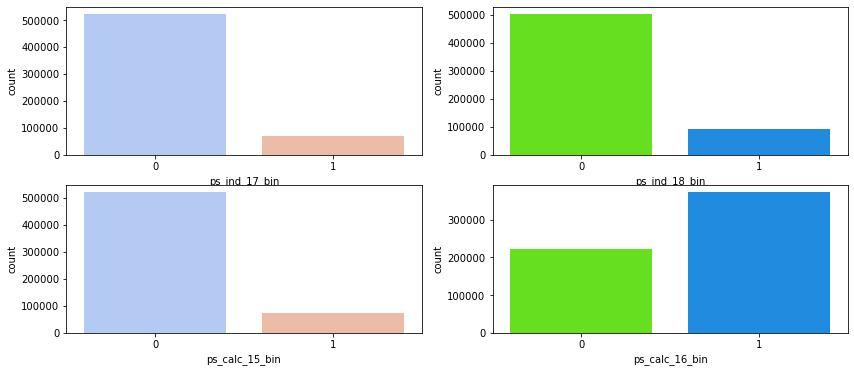

In [33]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data_nm['ps_ind_17_bin'],palette='coolwarm',ax=ax1)
sns.countplot(data_nm['ps_ind_18_bin'],palette='gist_rainbow',ax=ax2)
sns.countplot(data_nm['ps_calc_15_bin'],palette='coolwarm',ax=ax3)
sns.countplot(data_nm['ps_calc_16_bin'],palette='gist_rainbow',ax=ax4)

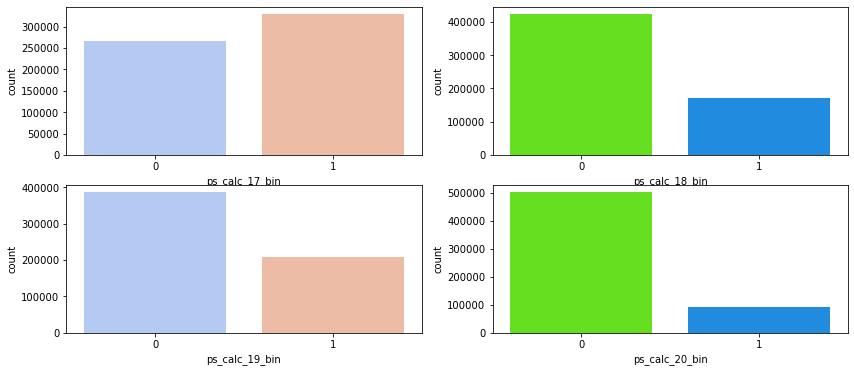

In [34]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data_nm['ps_calc_17_bin'],palette='coolwarm',ax=ax1)
sns.countplot(data_nm['ps_calc_18_bin'],palette='gist_rainbow',ax=ax2)
sns.countplot(data_nm['ps_calc_19_bin'],palette='coolwarm',ax=ax3)
sns.countplot(data_nm['ps_calc_20_bin'],palette='gist_rainbow',ax=ax4)

In [45]:
def get_meta(data_nm):
    data = []
    for col in data_nm.columns:
        # Defining the role
        if col == 'target_name':
            role = 'target_name'
        elif col == 'id':
            role = 'id'
        else:
            role = 'input'

        # Defining the level
        if 'bin' in col or col == 'target_name':
            level = 'binary'
        elif 'cat' in col or col == 'id':
            level = 'nominal'
        elif data_nm[col].dtype == np.float64:
            level = 'interval'
        elif data_nm[col].dtype == np.int64:
            level = 'ordinal'

        # Initialize keep to True for all variables except for id
        keep = True
        if col == 'id':
            keep = False

        # Defining the data type 
        dtype = data_nm[col].dtype

        # Creating a Dict that contains all the metadata for the variable
        col_dict = {
            'varname': col,
            'role'   : role,
            'level'  : level,
            'keep'   : keep,
            'dtype'  : dtype
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
    meta.set_index('varname', inplace=True)
    return meta

In [46]:
meta_data = get_meta(data_nm)
display(meta_data)

,role,level,keep,dtype
varname,,,,
target,input,ordinal,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64
ps_ind_08_bin,input,binary,True,int64


In [47]:
meta_counts = meta_data\
                    .groupby(['role', 'level'])\
                        .agg({'dtype': lambda x: x.count()})\
                            .reset_index()
display(meta_counts)

,role,level,dtype
0,input,binary,17
1,input,interval,10
2,input,nominal,14
3,input,ordinal,17
4,target_name,binary,1


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Variable Type'),
 Text(0.5, 1.0, 'Variables Count Across Datatype')]

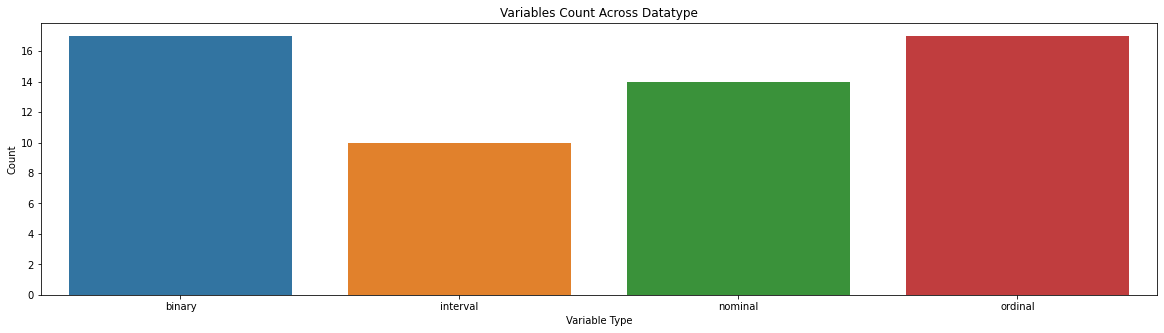

In [48]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=meta_counts[(meta_counts.role != 'target_name') & (meta_counts.role != 'id') ],
            x="level",
            y="dtype",
            ax=ax)

ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

In [49]:
##Working on Missing Values
#Values of -1 indicate that the feature was missing from the observation check for -1 (NAs in our data)
# Varibale wise count of missing values
(data_nm==-1).sum().sum()

846453

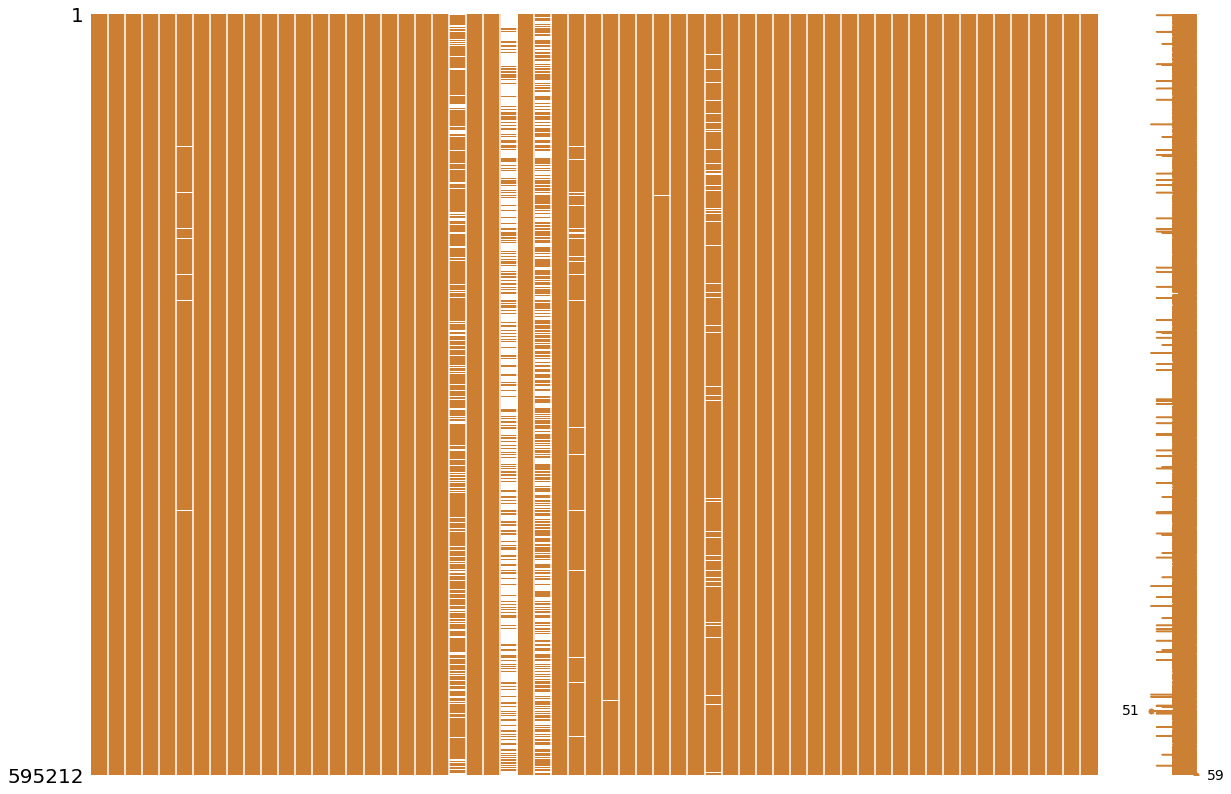

In [50]:
## The white colour represents the Missing values
import missingno as msno

train_null = data_nm
train_null = train_null.replace(-1, np.NaN)

msno.matrix(df=train_null.iloc[:, :], figsize=(20, 14), color=(0.8, 0.5, 0.2))   

In [51]:
# Extract columns with null data
train_null = train_null.loc[:, train_null.isnull().any()]
print(train_null.columns)

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat',
       'ps_car_09_cat', 'ps_car_11', 'ps_car_12', 'ps_car_14'],
      dtype='object')


In [52]:
print('Columns \t Number of NaN')
for column in train_null.columns:
    print('{}:\t {}'.format(column,len(train_null[column][np.isnan(train_null[column])])))

Columns 	 Number of NaN
ps_ind_02_cat:	 216
ps_ind_04_cat:	 83
ps_ind_05_cat:	 5809
ps_reg_03:	 107772
ps_car_01_cat:	 107
ps_car_03_cat:	 411231
ps_car_05_cat:	 266551
ps_car_07_cat:	 11489
ps_car_09_cat:	 569
ps_car_11:	 5
ps_car_12:	 1
ps_car_14:	 42620


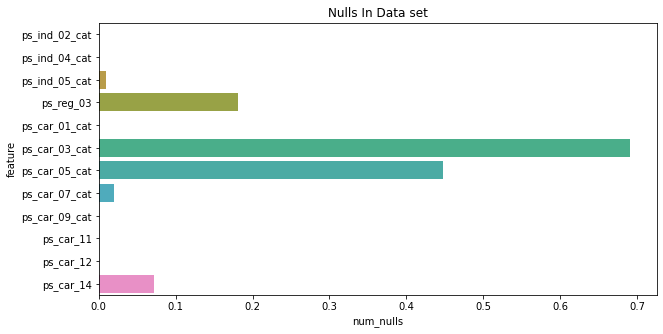

In [55]:
plt.rcParams['figure.figsize']=(10,5)

train_null_columns = []
train_num_nulls = []
for c in data_nm.columns:
    null_rows = data_nm[data_nm[c] == -1]
    if len(null_rows) > 0:
        train_null_columns.append(c)
        train_num_nulls.append(len(null_rows)/len(data_nm))
        
df_train_nulls = pd.DataFrame(columns=['feature', 'num_nulls'])
df_train_nulls['feature'] = train_null_columns
df_train_nulls['num_nulls'] = train_num_nulls
df_train_nulls.head()
ax = sns.barplot(x="num_nulls", y="feature", data=df_train_nulls)
plt.title('Nulls In Data set')
plt.show()

In [71]:
row_count = data_nm.shape[0]
for c in data_nm.columns:
    m_count = df[df[c] == -1][c].count()
if m_count > 0:
    print(f'{c} - {m_count} ({round(percentage(m_count, row_count), 3)}%) rows missing')

In [73]:
# Although it uses more memory, I prefer to create a new copy of the dataframe for each section
df_cleaned = data_nm.copy()

# I will also create copies for the feature lists
num_feats_cleaned = numeric_features.copy()
cat_feats_cleaned = categorical_features.copy()
bin_feats_cleaned = binary_features.copy()

In [75]:
# I would like to eliminate any columns that consist of more than one half missing values (-1) in numerical features
num_many_missing = df_cleaned[num_feats_cleaned][data_nm == -1].count() / len(data_nm) > 0.50 # more than 50% missing values
num_many_missing = num_many_missing.index[num_many_missing == True].tolist()
print(num_many_missing)

[]


In [77]:
#No columns were returned in above. We can also have a look at exactly how many are missing in the applicable columns.
counts = df_cleaned[num_feats_cleaned][data_nm == -1].count()
cols_with_missing = counts[counts.values > 0]
print('Column  ', 'Missing count  ', 'Missing ratio')
for col, count in zip(cols_with_missing.index, cols_with_missing.values):
    print(col, '  ', count, '  ', '{:.3f}'.format(count / len(data_nm)))

Column   Missing count   Missing ratio
ps_reg_03    107772    0.181
ps_car_11    5    0.000
ps_car_12    1    0.000
ps_car_14    42620    0.072


In [78]:
# The few missing values that remain will be substituted with the column mean
for col in num_feats_cleaned:
    df_cleaned[col][df_cleaned[col] == -1] = df_cleaned[col].mean()
# Check that no missing values remain
(df_cleaned[num_feats_cleaned] == -1).sum().sum()   # sums instances of true for each column and then sums across columns

#We can be satisfied that no missing values remain.

0

In [79]:
#Categorical features
#I would like to eliminate any columns that consist of more than one-half missing values (-1). 
#If features contain a relatively small proportion of missing values, 
#these values can be converted to dummy variables and may be a useful part of the analysis.

cat_many_missing = df_cleaned[cat_feats_cleaned][data_nm == -1].count() / len(data_nm) > 0.5
cat_many_missing = cat_many_missing.index[cat_many_missing == True].tolist()
print(cat_many_missing)

['ps_car_03_cat']


In [81]:
# We can also have a look exactly how many are missing in the applicable columns
counts = df_cleaned[cat_feats_cleaned][data_nm == -1].count()
cols_with_missing = counts[counts.values > 0]
print('Column  ', 'Missing count  ', 'Missing ratio')
for col, count in zip(cols_with_missing.index, cols_with_missing.values):
    print(col, '  ', count, '  ', '{:.3f}'.format(count / len(data_nm)))

Column   Missing count   Missing ratio
ps_ind_02_cat    216    0.000
ps_ind_04_cat    83    0.000
ps_ind_05_cat    5809    0.010
ps_car_01_cat    107    0.000
ps_car_03_cat    411231    0.691
ps_car_05_cat    266551    0.448
ps_car_07_cat    11489    0.019
ps_car_09_cat    569    0.001
